In [1]:
from amuse.units import units
from amuse.units import constants
from amuse.lab import Huayno, nbody_system, new_galactics_model
import copy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from amuse.couple import bridge
from amuse.lab import Gadget2
from amuse.community.hermite.interface import Hermite
from amuse.community.bhtree.interface import BHTree
from astropy.io import fits
import time
from amuse.lab import Particles
from os import listdir
from os.path import isfile, join

In [2]:
Data = fits.open("Tidal_Wave/Final/Data/Final_save_data_2000.fits")

TrueData = Data[1].data

Xsetdata1 = TrueData.field("set_1_x") |units.m
Ysetdata1 = TrueData.field("set_1_y") |units.m
Zsetdata1 = TrueData.field("set_1_z") |units.m
VXsetdata1 = TrueData.field("set_1_vx")
VYsetdata1 = TrueData.field("set_1_vy")
VZsetdata1 = TrueData.field("set_1_vz")

Xsetdata2 = TrueData.field("set_2_x") |units.m
Ysetdata2 = TrueData.field("set_2_y") |units.m
Zsetdata2 = TrueData.field("set_2_z") |units.m
VXsetdata2 = TrueData.field("set_2_vx")
VYsetdata2 = TrueData.field("set_2_vy")
VZsetdata2 = TrueData.field("set_2_vz")

"""
galaxy1.x = Xsetdata1 | units.m
galaxy1.y = Ysetdata1 | units.m
galaxy1.z = Zsetdata1 | units.m
galaxy1.vx = VXsetdata1 | units.kms
galaxy1.vy = VYsetdata1 | units.kms
galaxy1.vz = VZsetdata1 | units.kms

galaxy2.x = Xsetdata2 | units.m
galaxy2.y = Ysetdata2 | units.m
galaxy2.z = Zsetdata2 | units.m
galaxy2.vx = VXsetdata2 | units.kms
galaxy2.vy = VYsetdata2 | units.kms
galaxy2.vz = VZsetdata2 | units.kms
"""

'\ngalaxy1.x = Xsetdata1 | units.m\ngalaxy1.y = Ysetdata1 | units.m\ngalaxy1.z = Zsetdata1 | units.m\ngalaxy1.vx = VXsetdata1 | units.kms\ngalaxy1.vy = VYsetdata1 | units.kms\ngalaxy1.vz = VZsetdata1 | units.kms\n\ngalaxy2.x = Xsetdata2 | units.m\ngalaxy2.y = Ysetdata2 | units.m\ngalaxy2.z = Zsetdata2 | units.m\ngalaxy2.vx = VXsetdata2 | units.kms\ngalaxy2.vy = VYsetdata2 | units.kms\ngalaxy2.vz = VZsetdata2 | units.kms\n'

In [3]:
def Distance(X1, X2, Y1, Y2, Z1, Z2):
    return np.sqrt((X1-X2)**2 + (Y1-Y2)**2 + (Z1-Z2)**2)

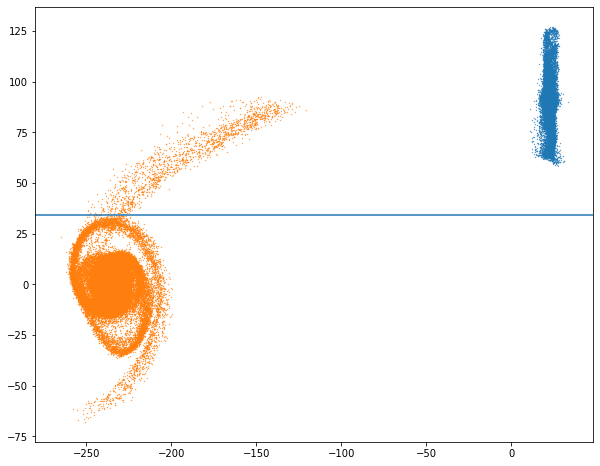

In [4]:
plt.figure(figsize = (10,8))
plt.scatter(Xsetdata1[:250000].value_in(units.kpc), Ysetdata1[:250000].value_in(units.kpc), s=0.1)
plt.scatter(Xsetdata2[:250000].value_in(units.kpc), Ysetdata2[:250000].value_in(units.kpc), s=0.1)
plt.axhline(y=34)
plt.show()

In [5]:
mask = np.where(Ysetdata2[:250000]>=34 | units.kpc)[0]
print(len(mask))

1599


In [6]:
test2 = []
for i in tqdm(range(2000, 6000, 10)):
    Data = fits.open("Tidal_Wave/Final/Data/Final_save_data_%04d.fits"%i)
    TrueData = Data[1].data
    
    Xsetdata2 = TrueData.field("set_2_x") |units.m
    Ysetdata2 = TrueData.field("set_2_y") |units.m
    Zsetdata2 = TrueData.field("set_2_z") |units.m
    
    x2 = Xsetdata2[mask].value_in(units.kpc)
    y2 = Ysetdata2[mask].value_in(units.kpc)
    z2 = Zsetdata2[mask].value_in(units.kpc)
    
    for j in range(0, len(mask)):
        Dis = Distance(x2[j], x2[j+1:], y2[j], y2[j+1:], z2[j], z2[j+1:])
        test = np.where(Dis < 0.1)[0]
        if len(test) >0:
            for l in range(0, len(test)):
                test2.append((i, j, test[l]+j+1, Dis[test[l]]*1000))

100%|██████████| 400/400 [00:16<00:00, 24.83it/s]


In [7]:
print(test2)

[(2000, 0, 909, 49.491040408611298), (2000, 248, 971, 63.903339207172394), (2000, 430, 434, 80.017626285552979), (2000, 801, 838, 97.472332417964935), (2000, 854, 1574, 99.642358720302582), (2000, 1020, 1042, 85.933029651641846), (2000, 1190, 1522, 92.292927205562592), (2010, 0, 909, 43.595127761363983), (2010, 33, 118, 91.028749942779541), (2010, 248, 971, 34.868434071540833), (2010, 430, 434, 56.309998035430908), (2010, 801, 838, 44.217020273208618), (2010, 940, 1307, 62.270373106002808), (2010, 1190, 1522, 36.419779062271118), (2020, 0, 909, 72.378173470497131), (2020, 33, 118, 43.372578918933868), (2020, 248, 971, 12.927993200719357), (2020, 318, 1049, 89.81255441904068), (2020, 430, 434, 49.545954912900925), (2020, 463, 995, 73.956921696662903), (2020, 801, 838, 16.612892970442772), (2020, 940, 1307, 79.956501722335815), (2020, 1190, 1522, 64.626209437847137), (2030, 33, 118, 22.505536675453186), (2030, 187, 777, 85.343532264232635), (2030, 248, 971, 35.102106630802155), (2030, 31

In [8]:
print(test2[0])
print(test2[0][2])

(2000, 0, 909, 49.491040408611298)
909


In [9]:
print(mask[790])
print(len(test2))

61041
613


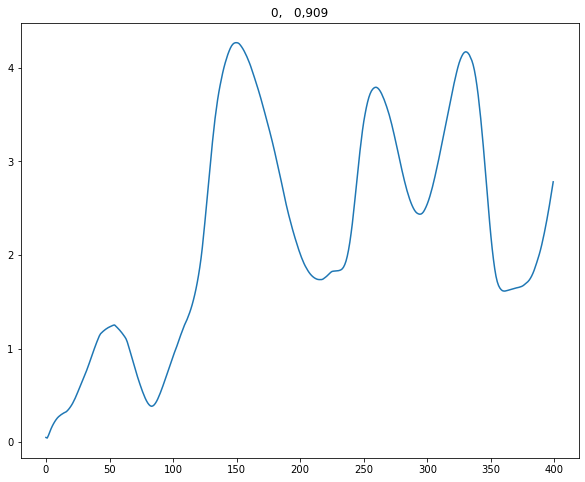

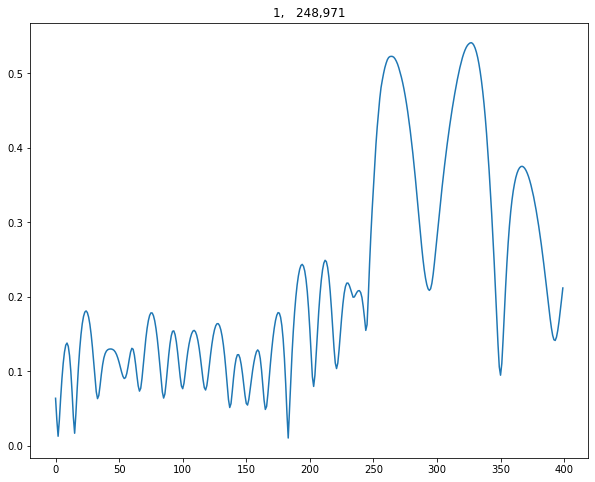

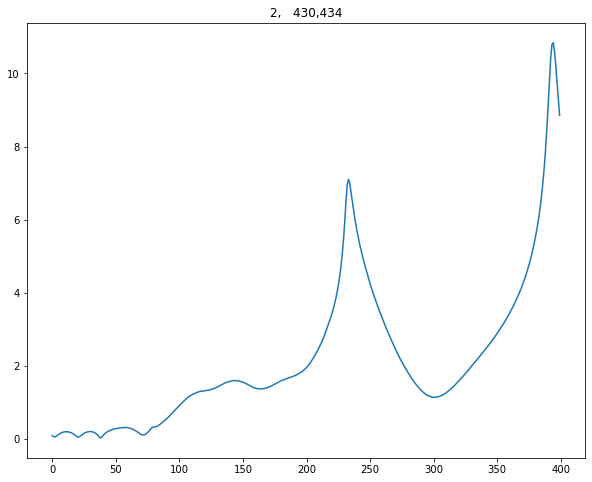

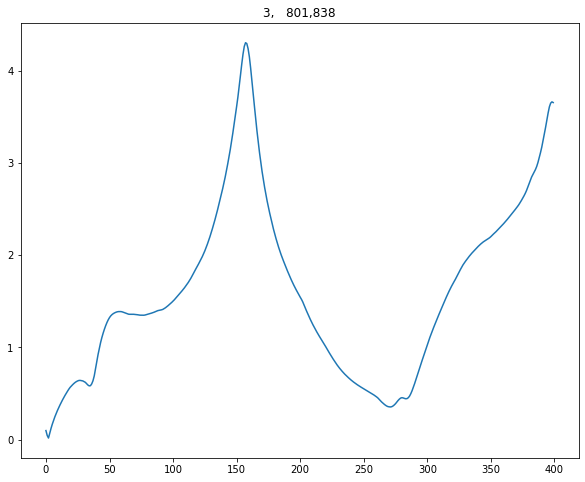

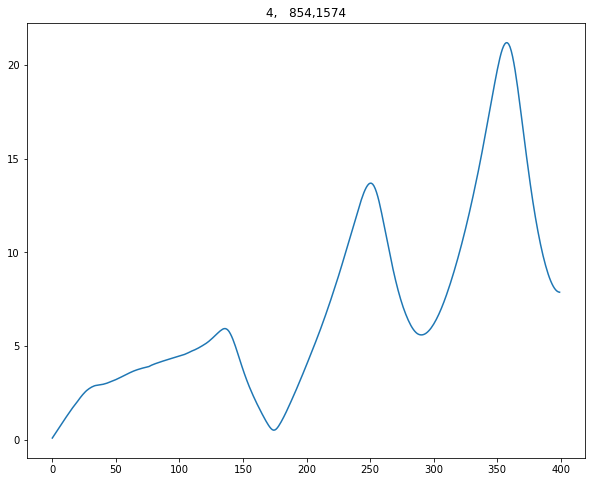

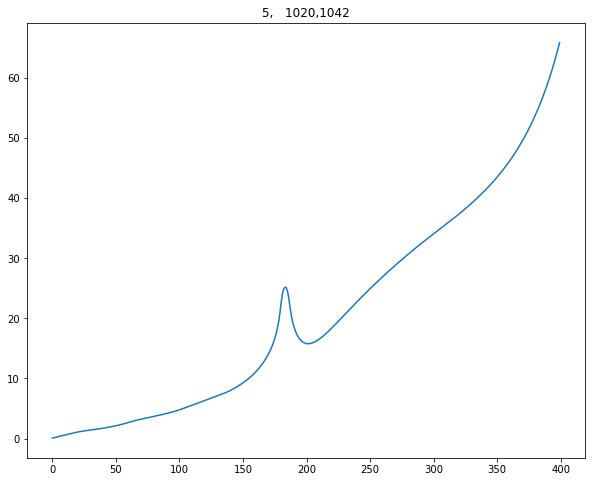

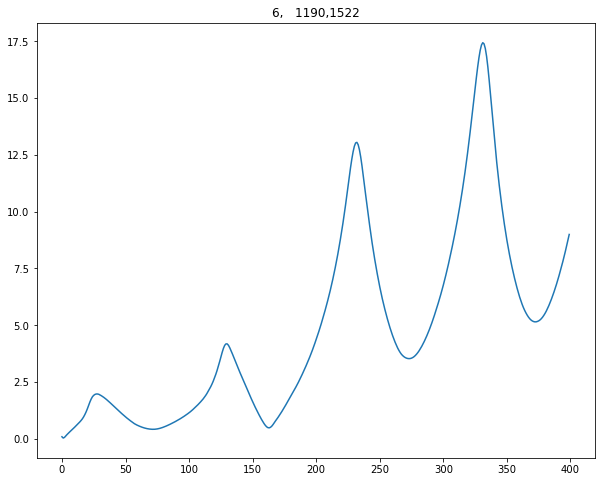

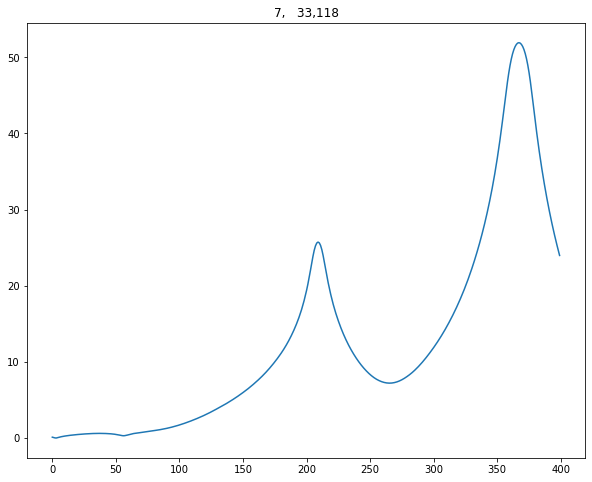

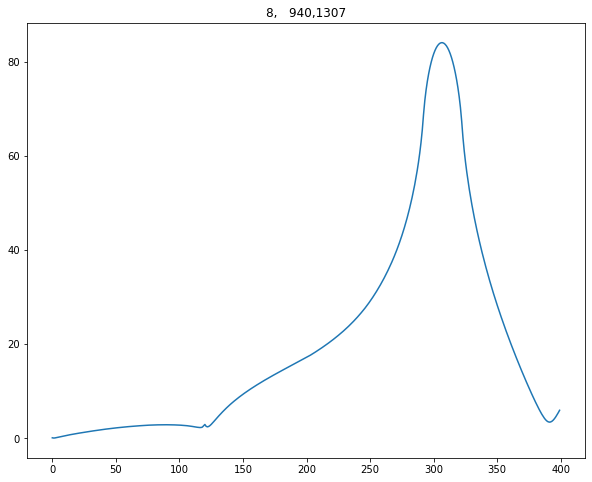

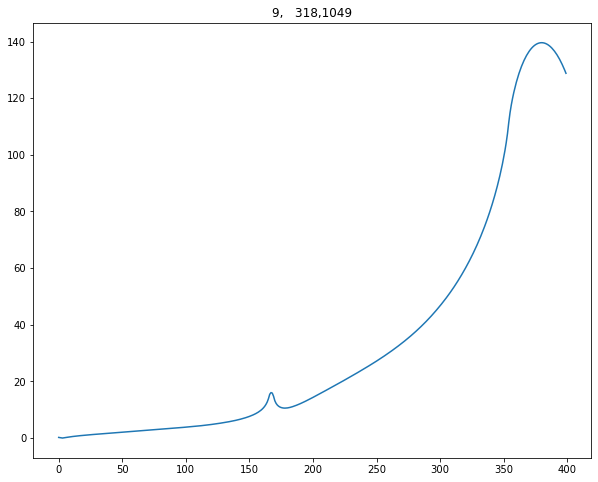

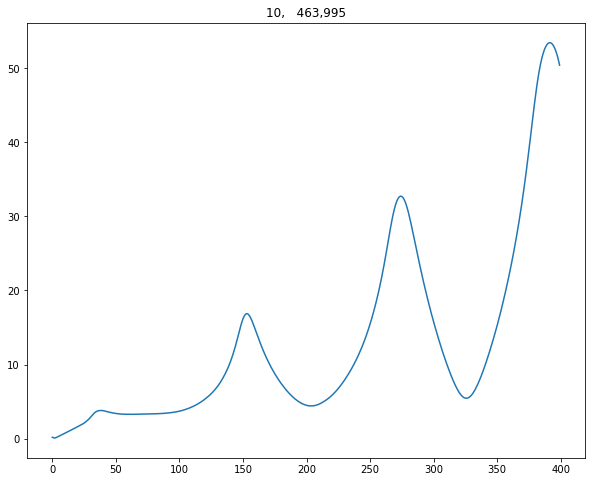

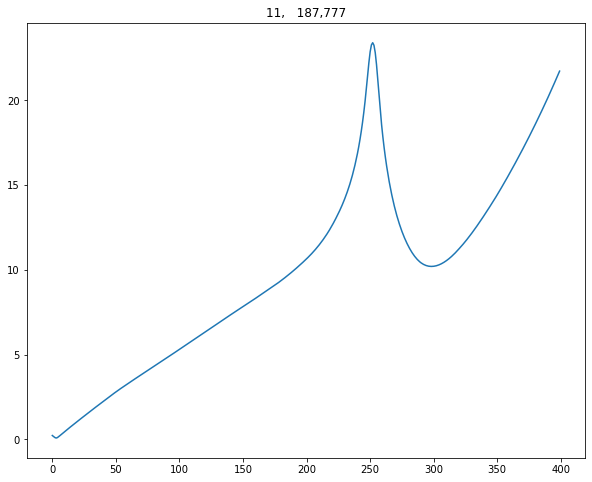

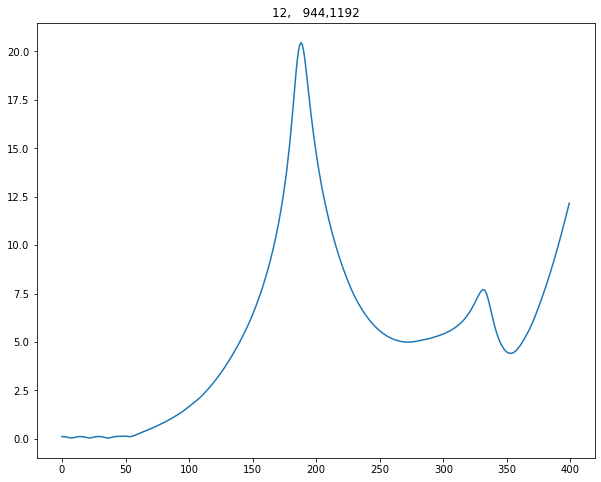

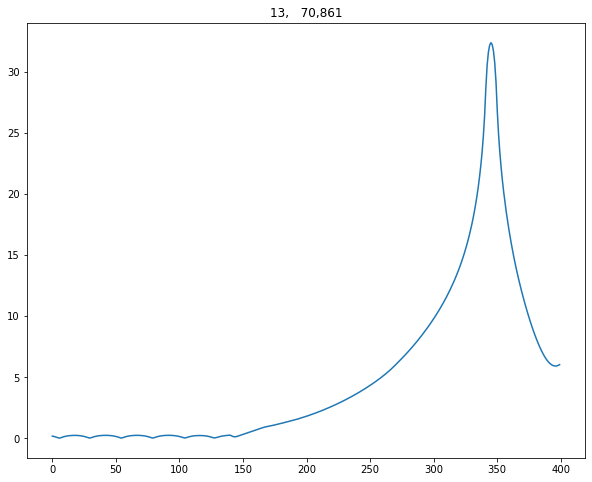

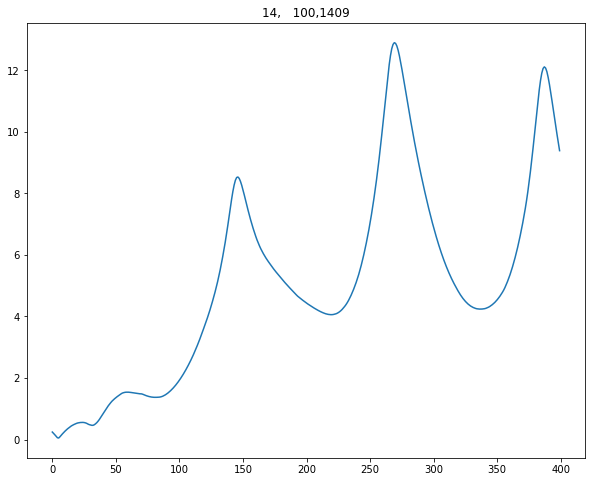

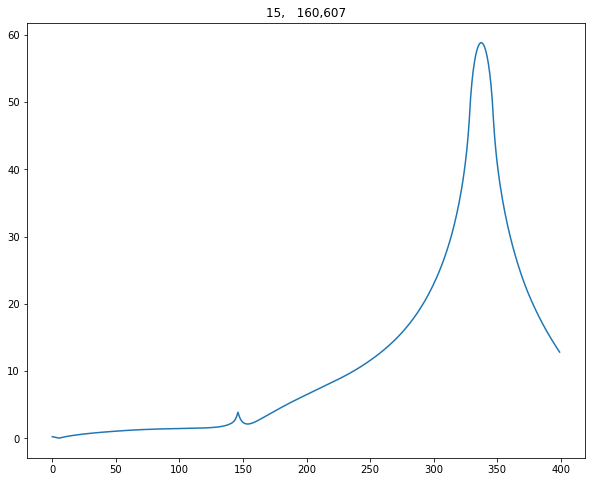

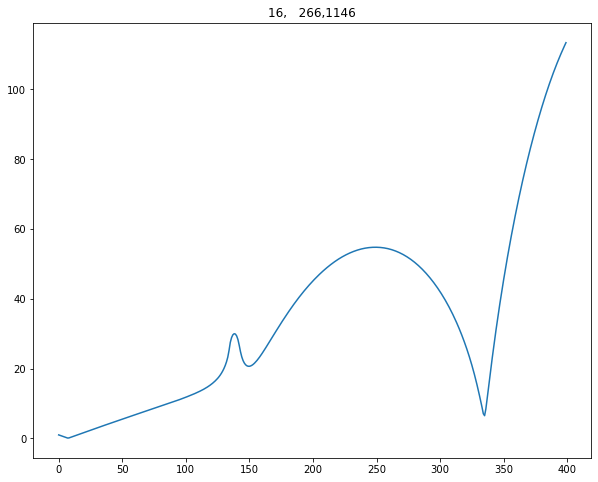

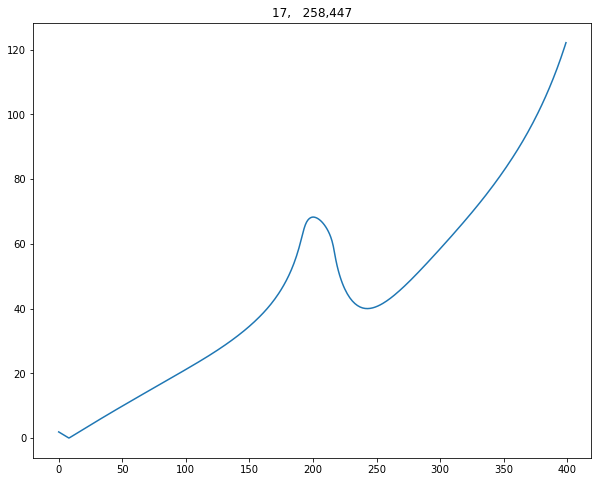

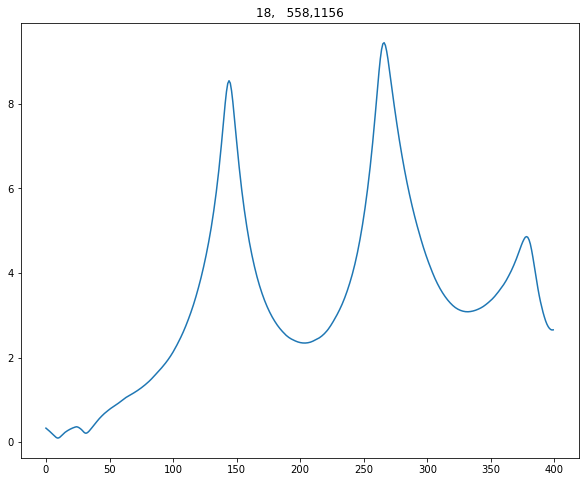

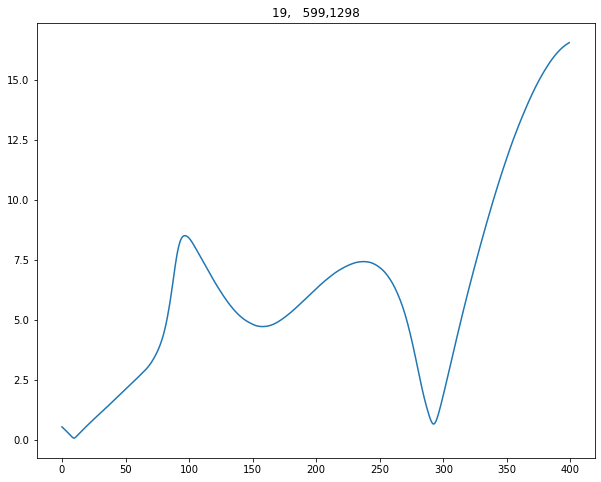

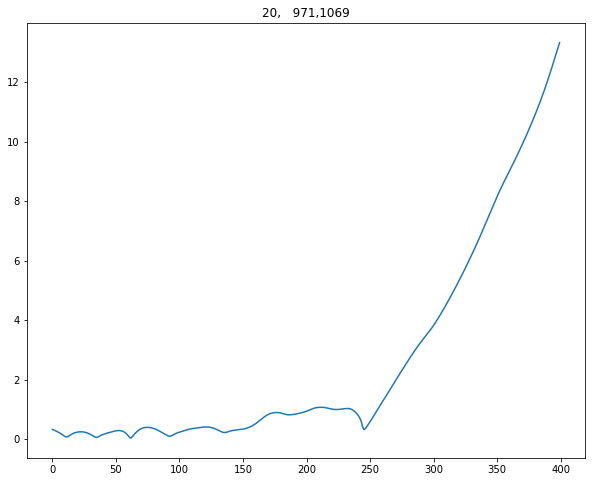

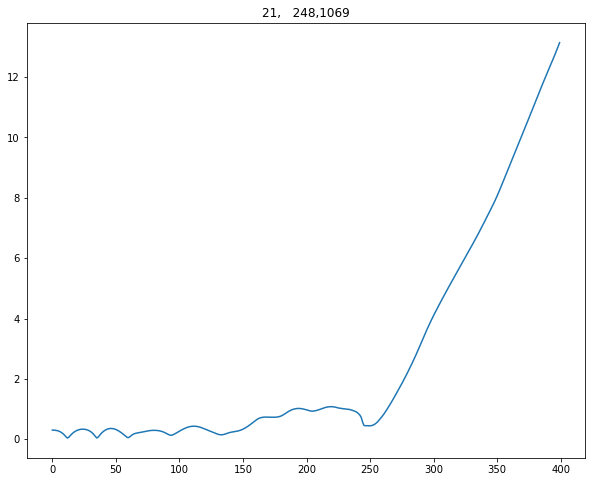

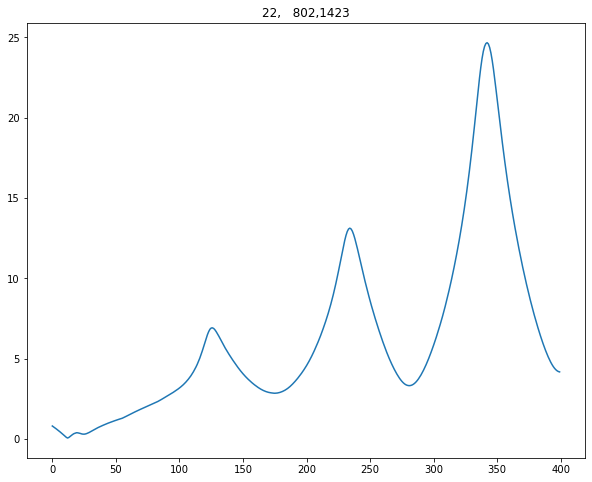

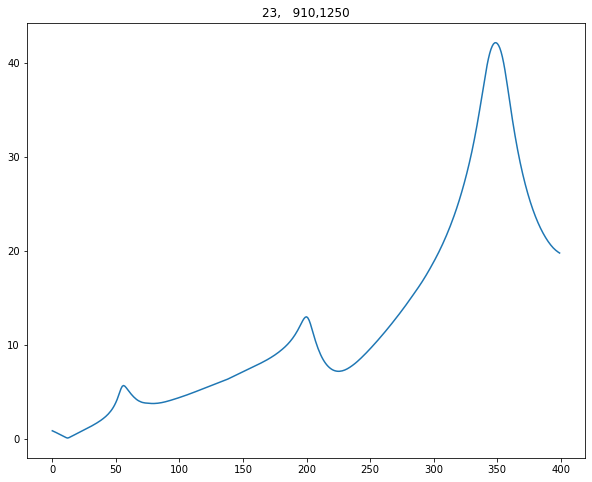

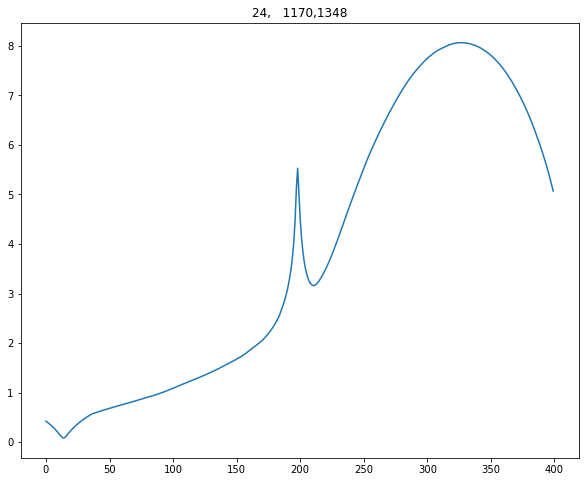

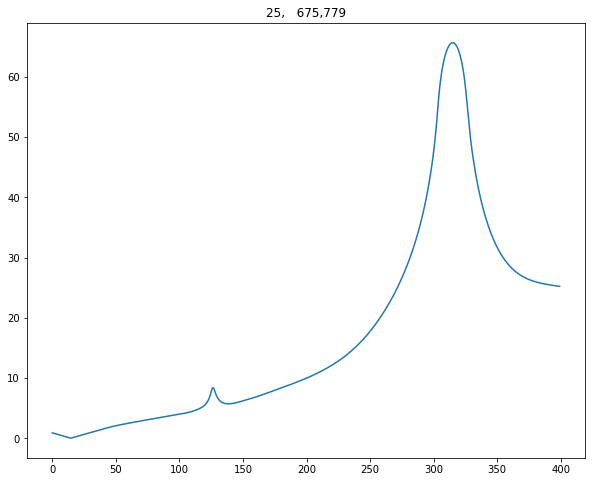

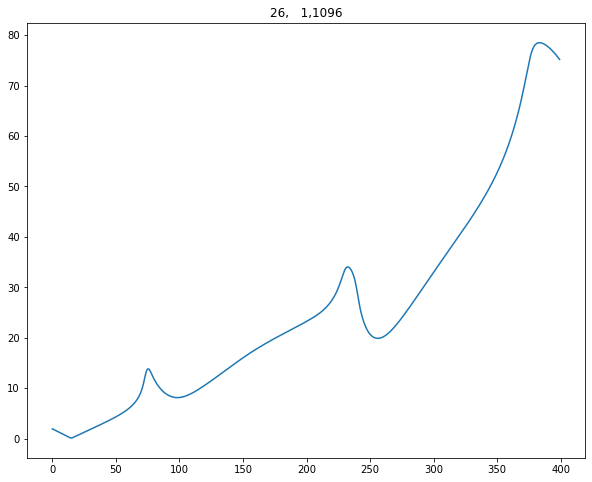

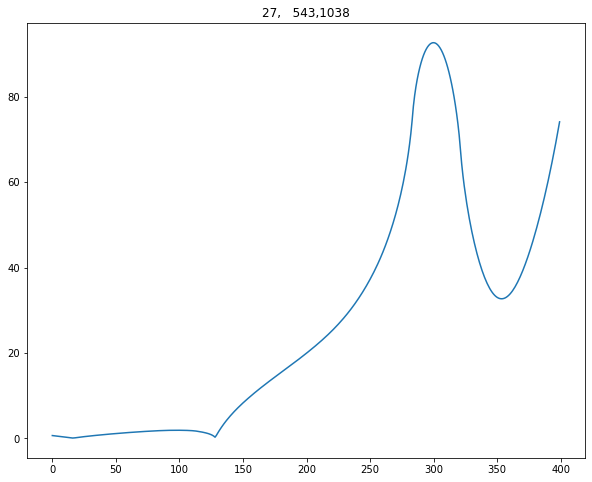

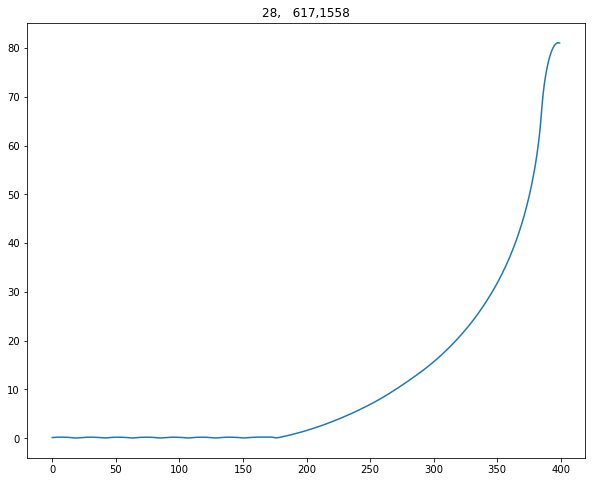

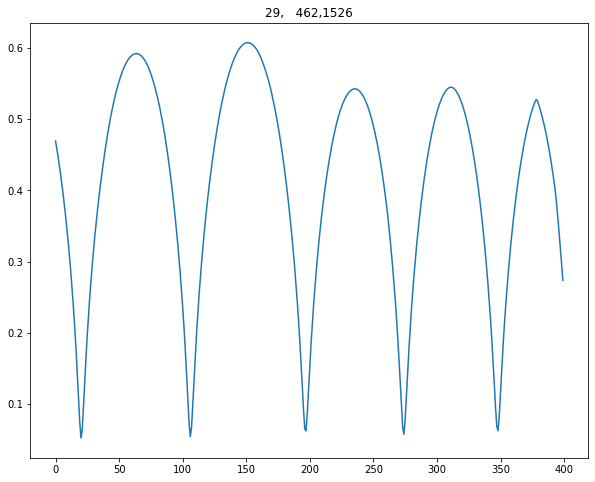

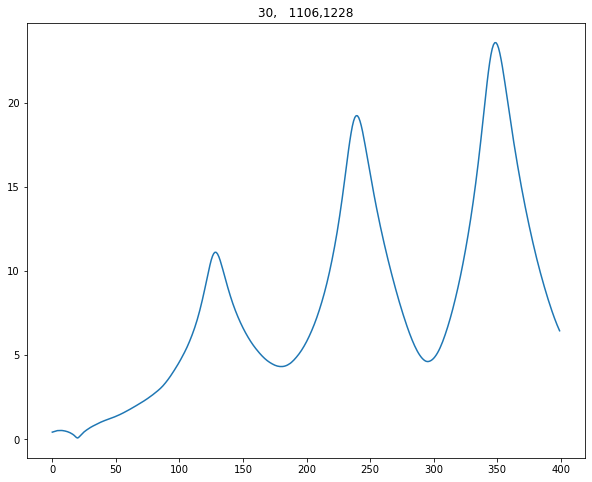

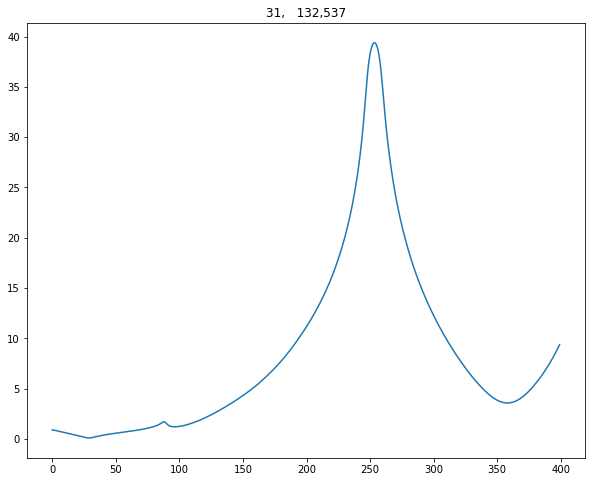

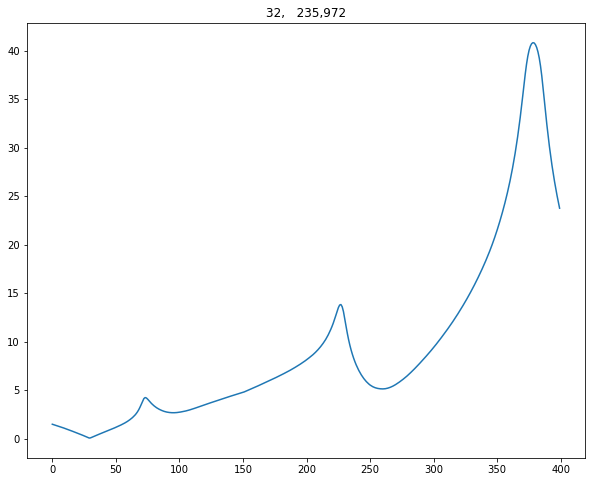

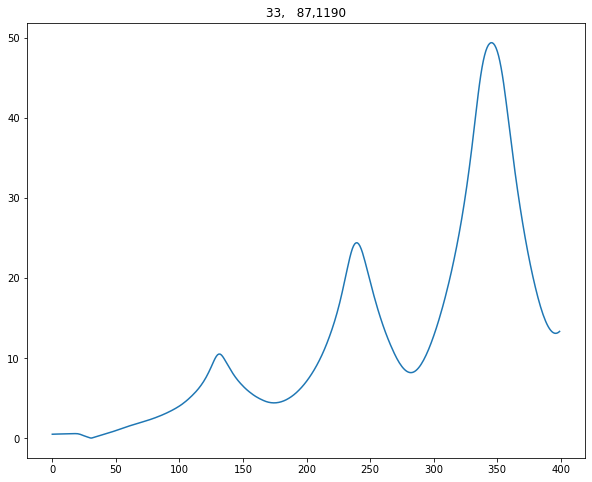

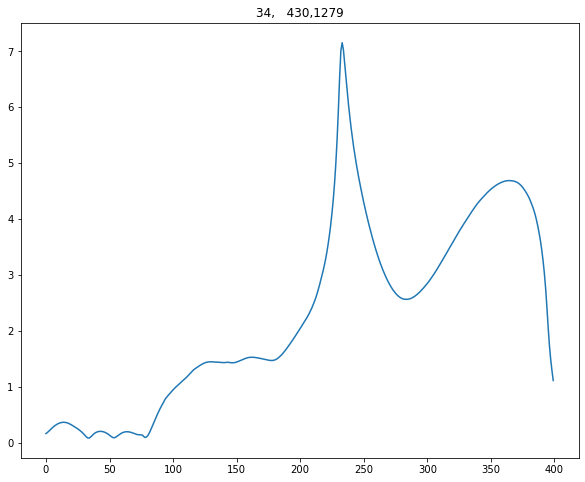

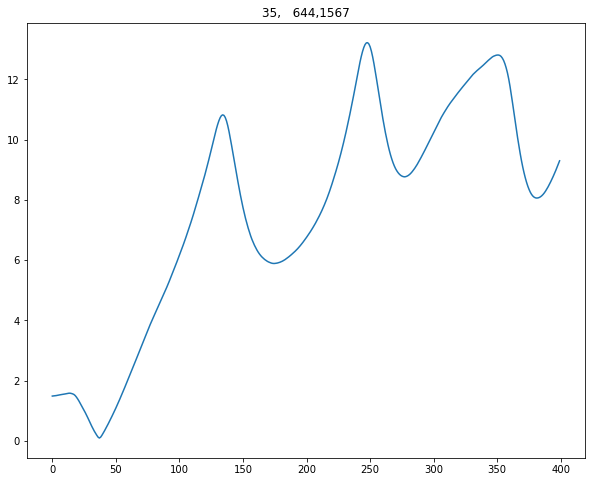

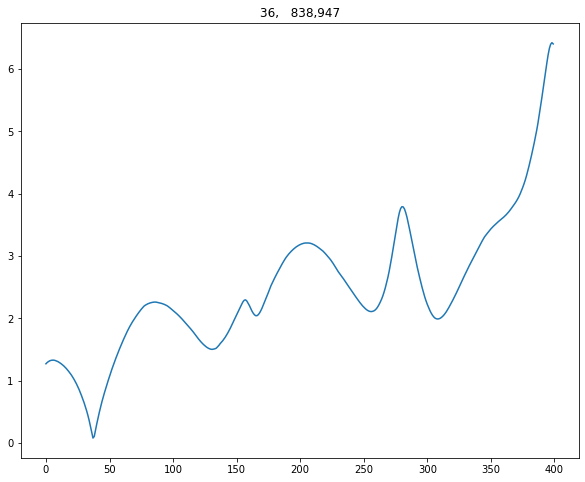

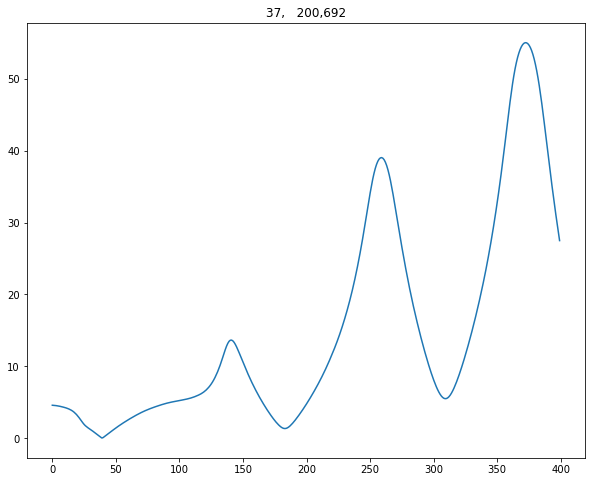

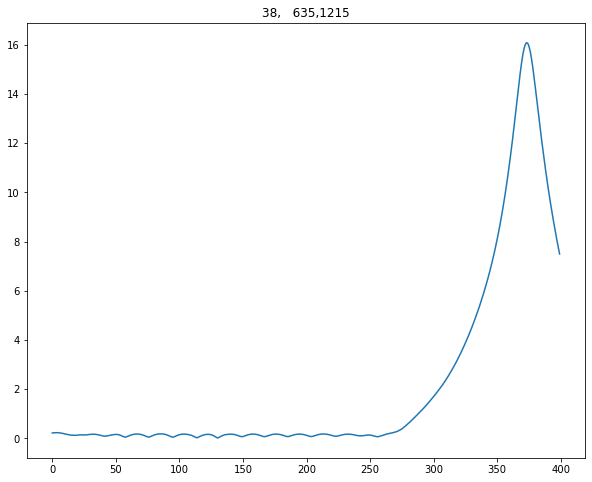

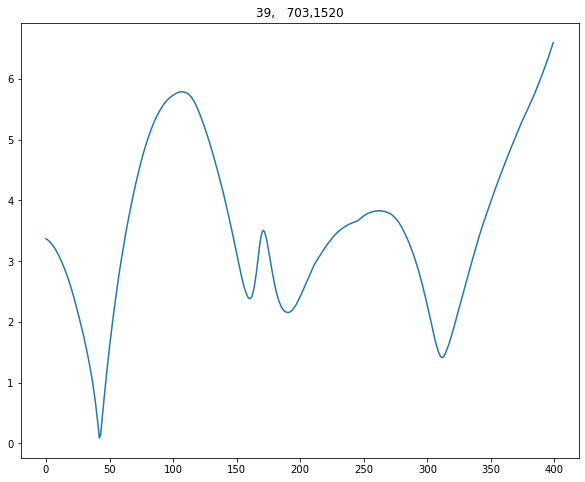

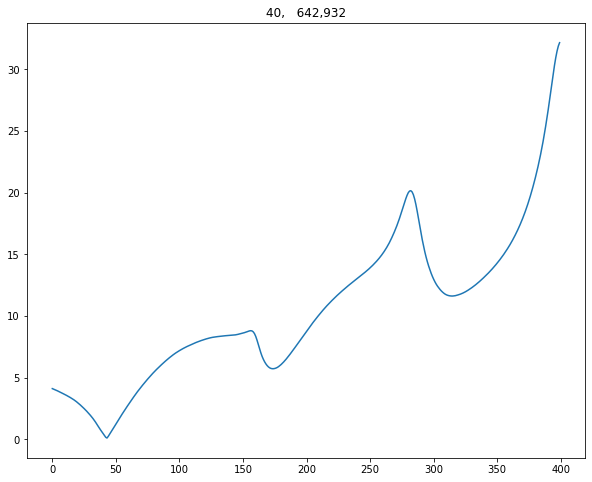

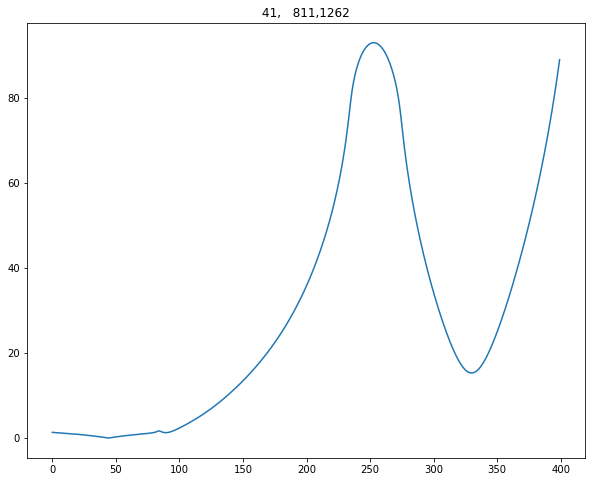

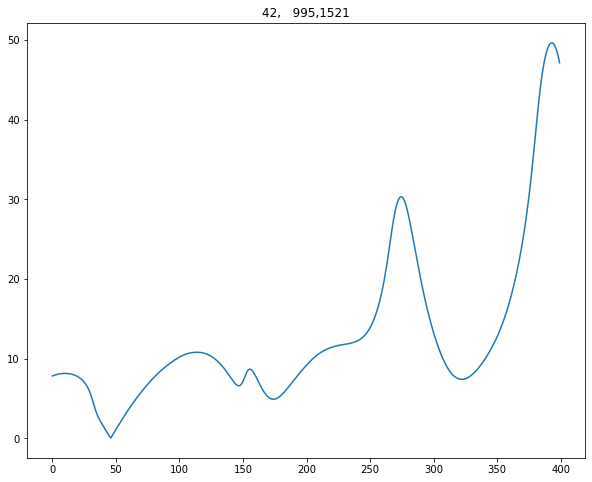

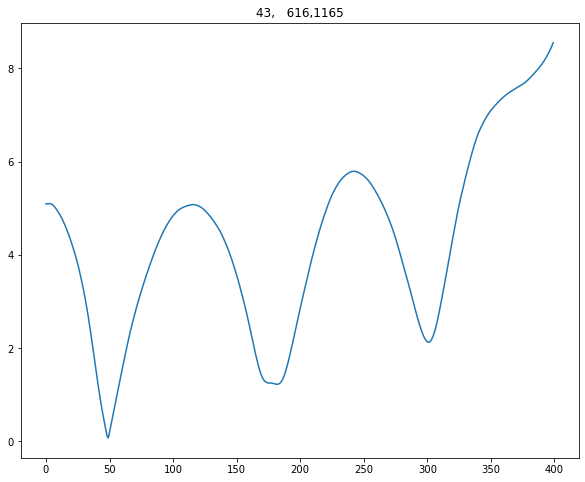

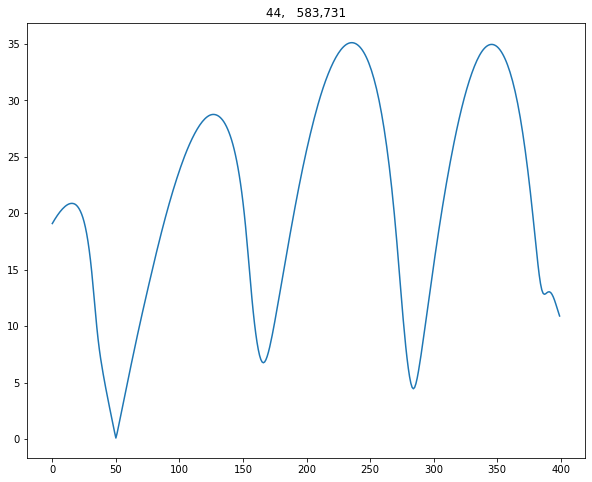

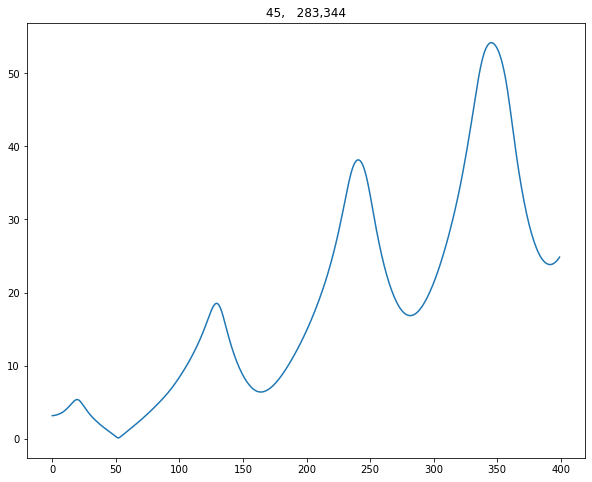

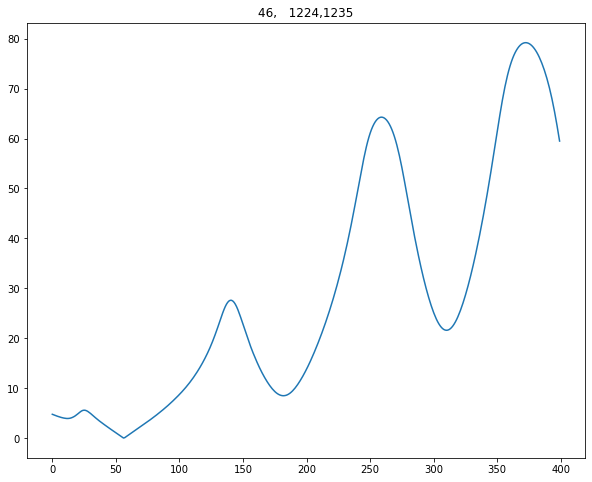

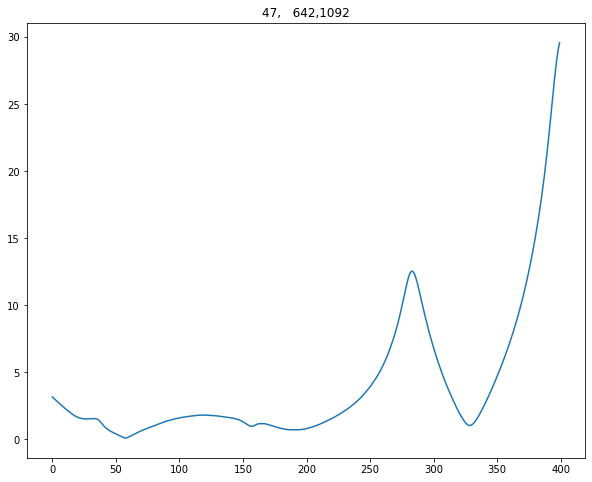

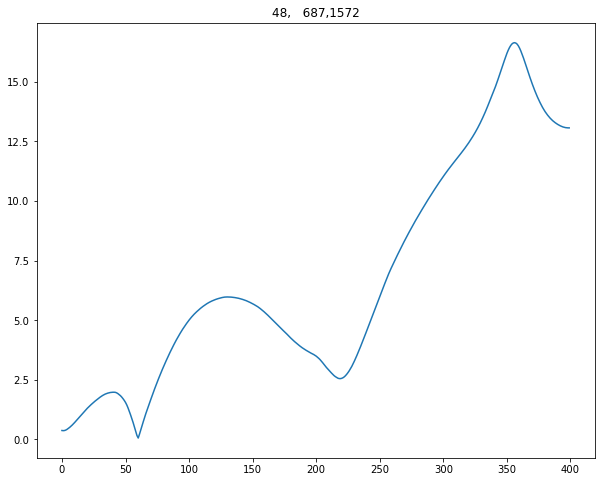

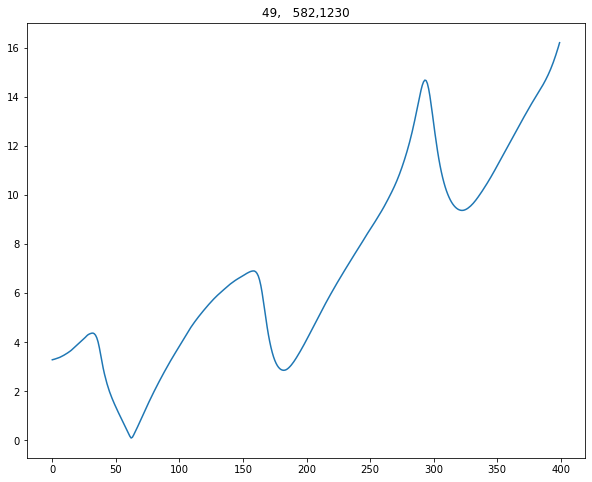

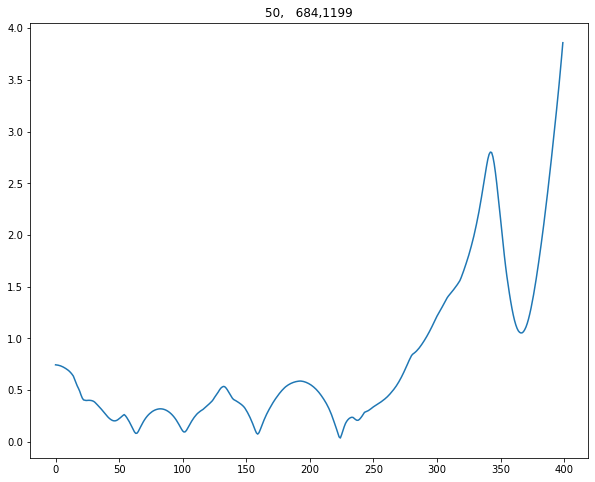

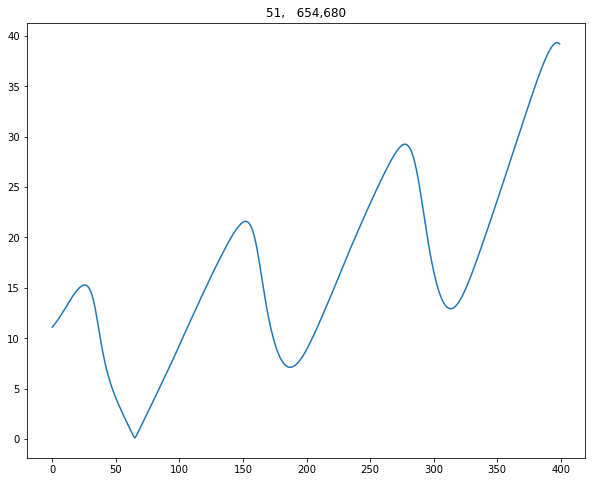

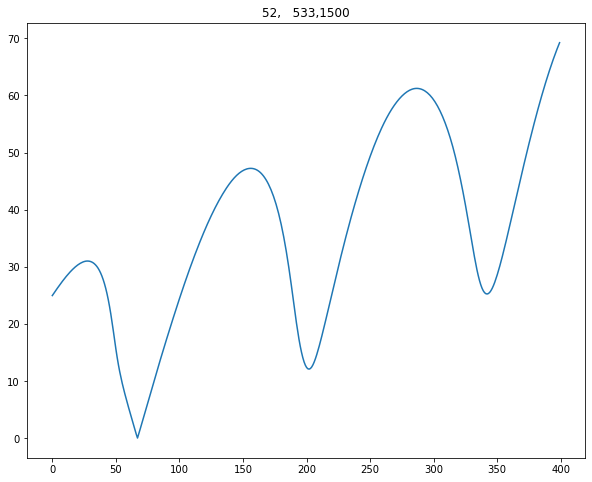

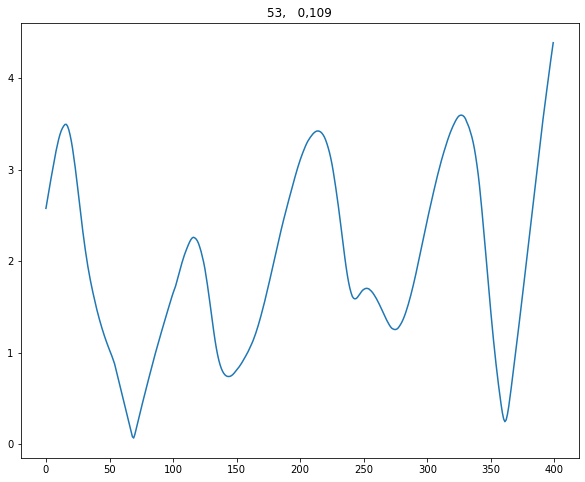

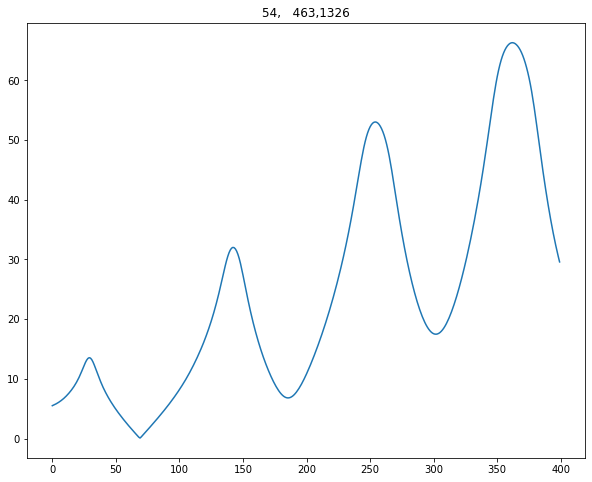

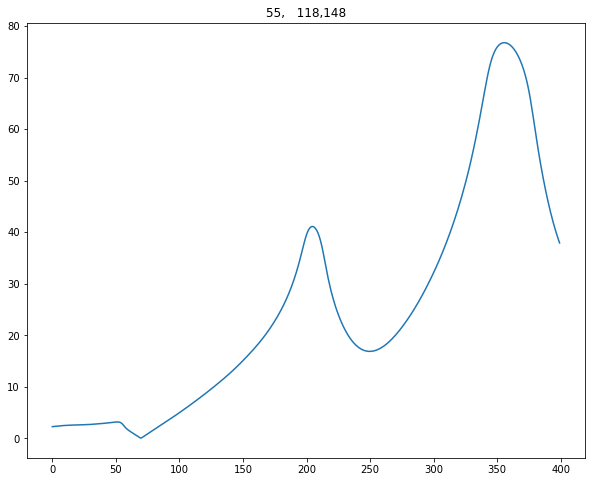

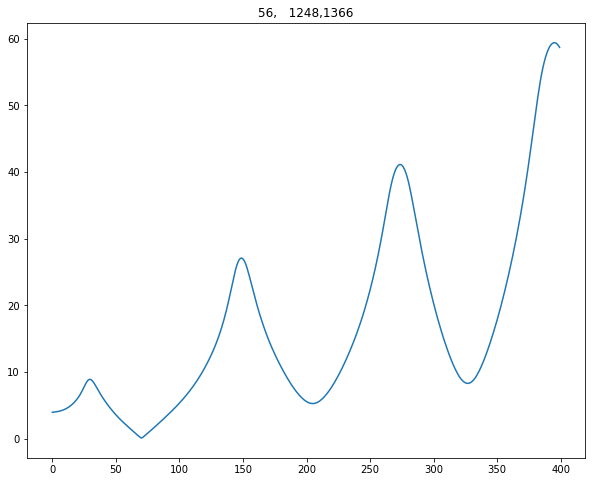

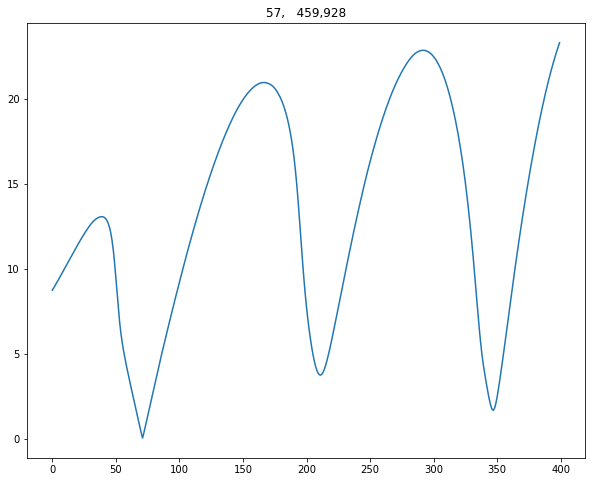

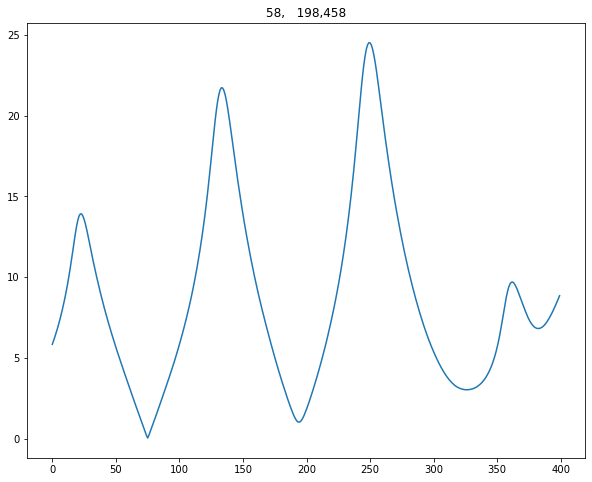

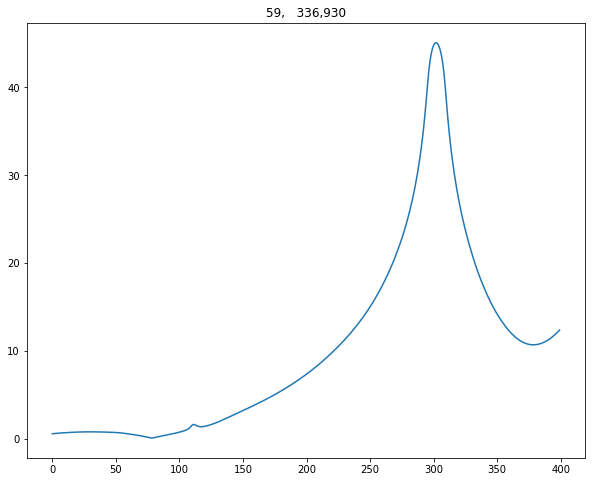

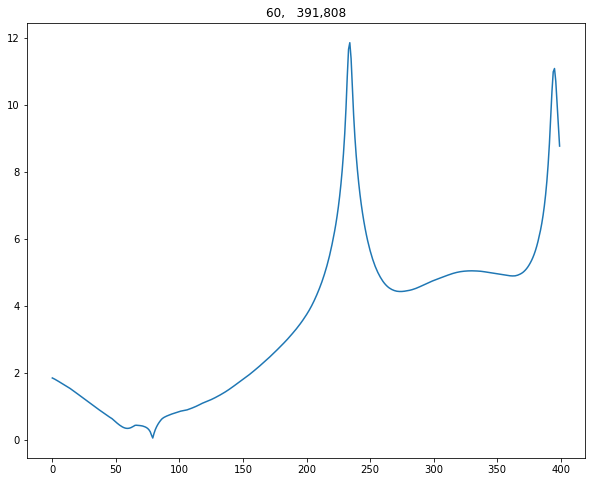

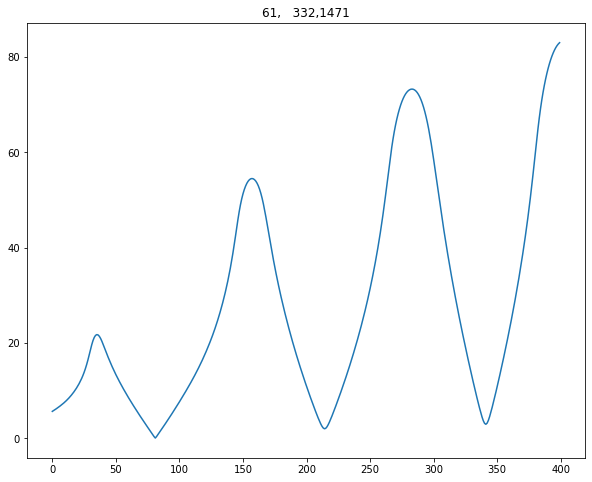

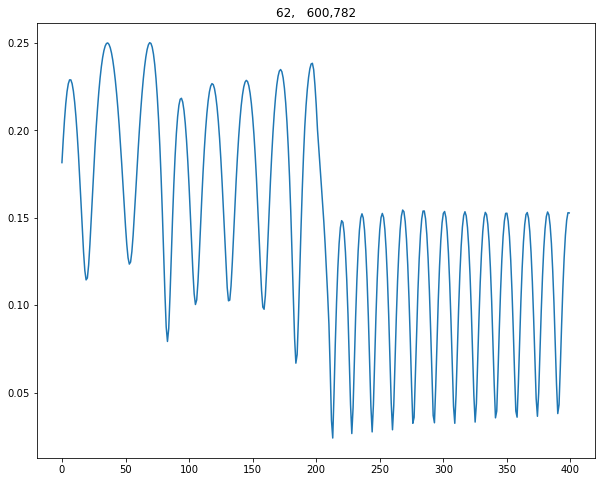

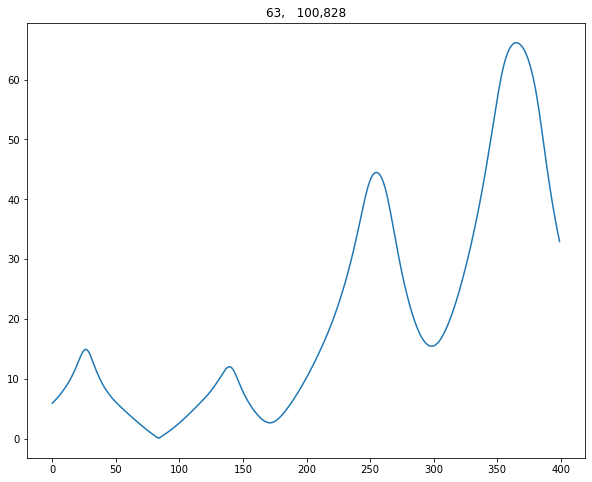

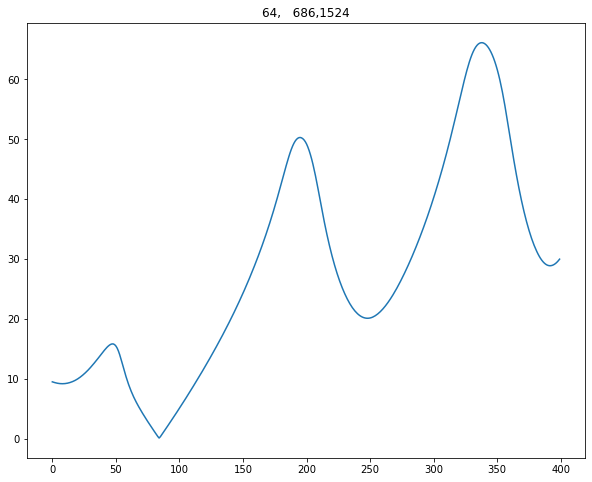

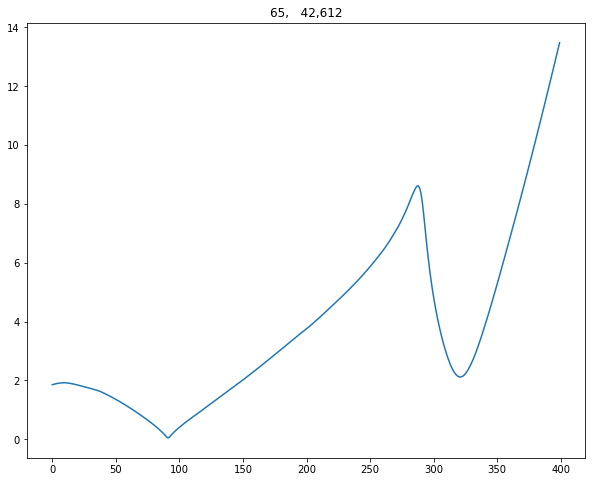

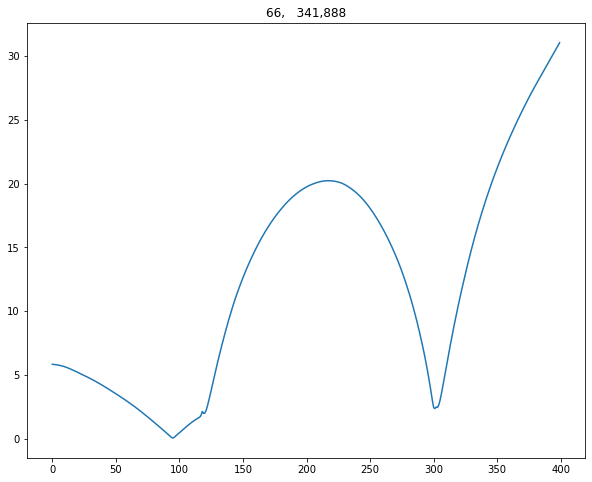

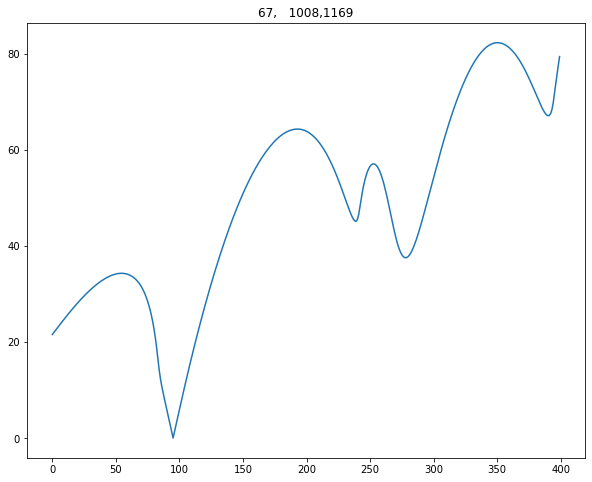

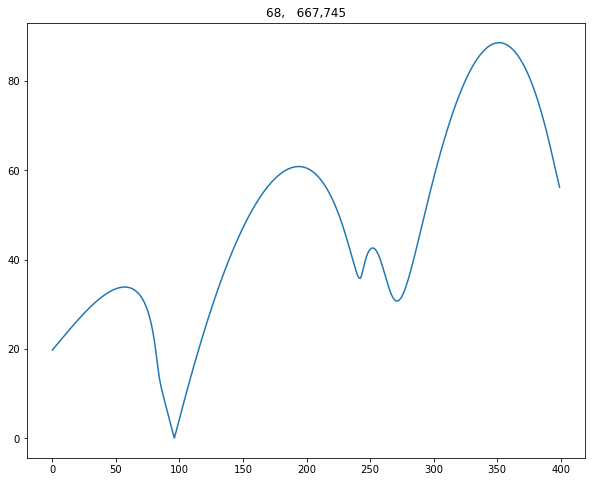

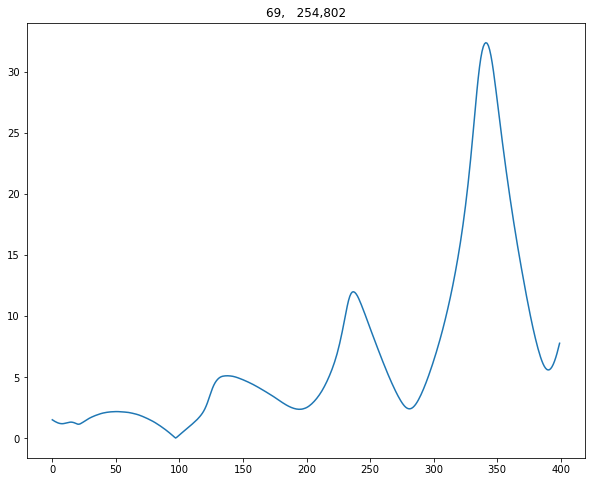

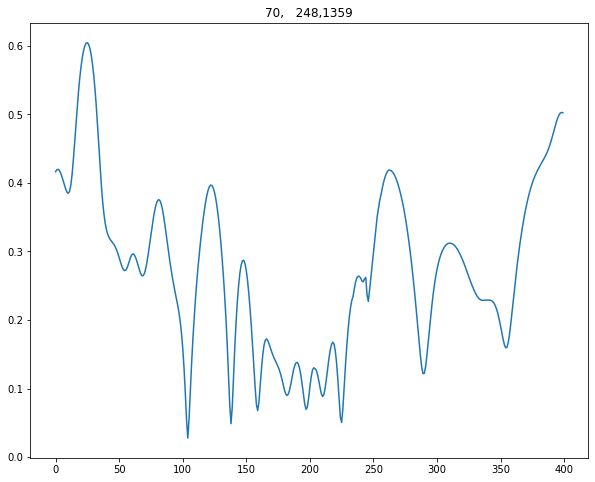

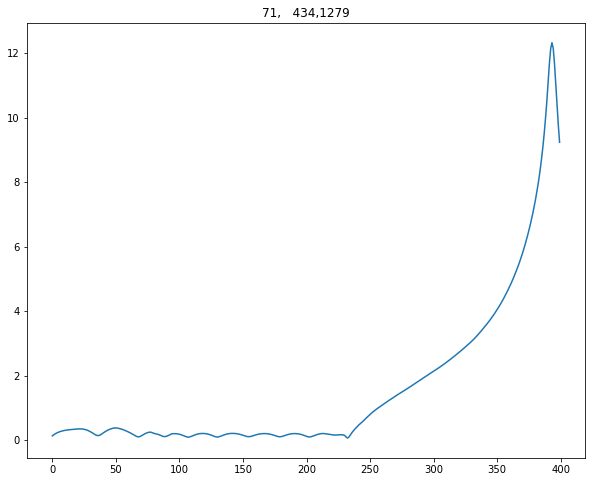

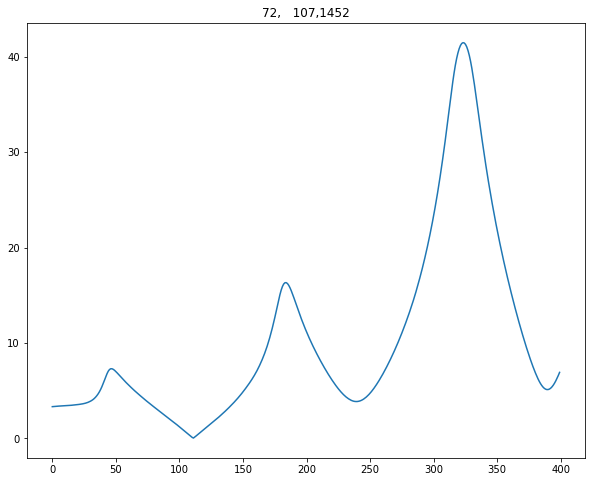

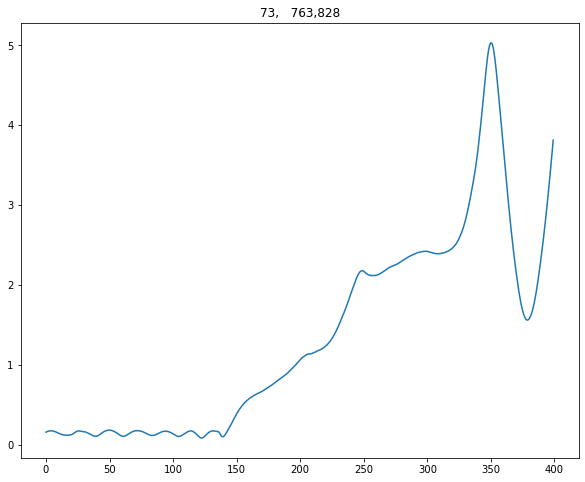

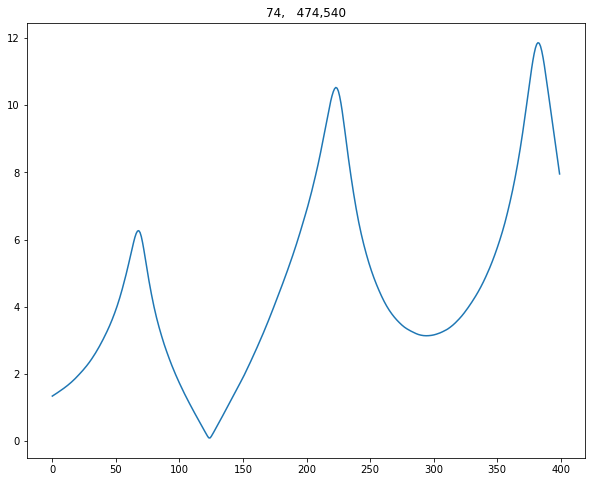

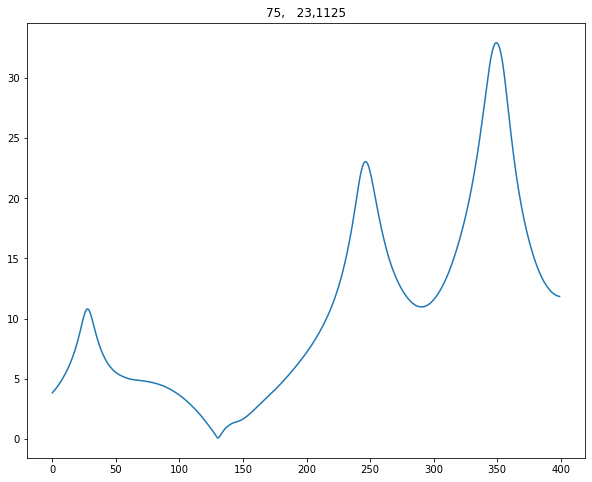

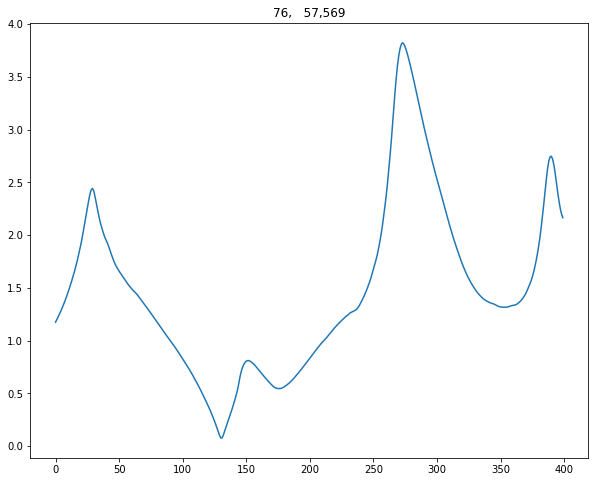

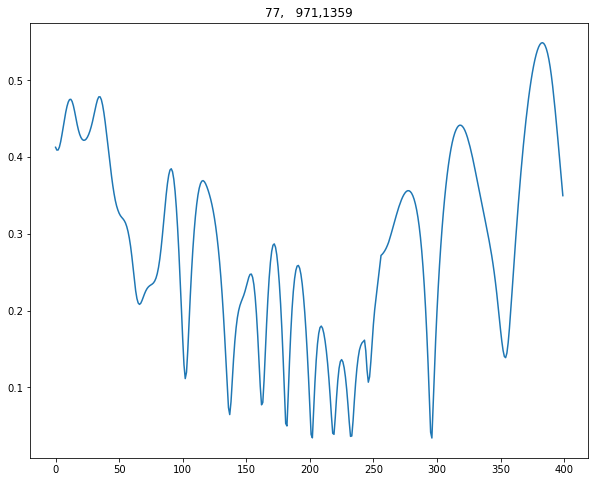

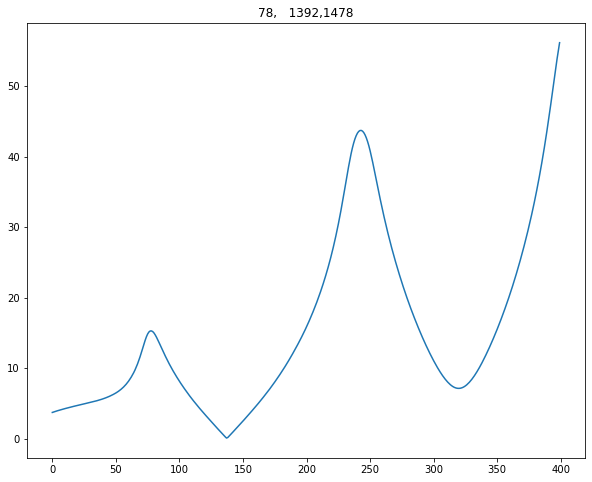

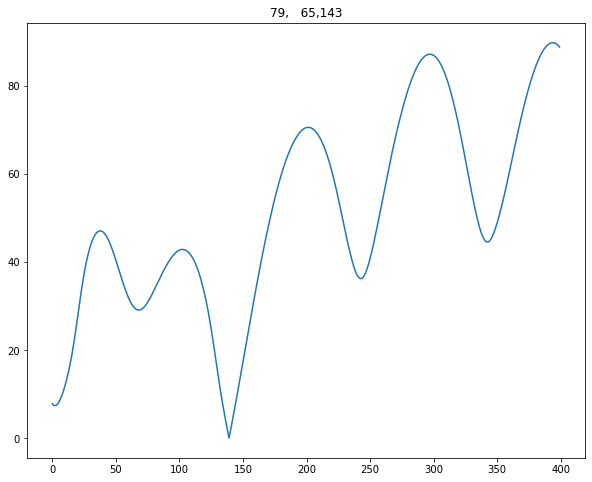

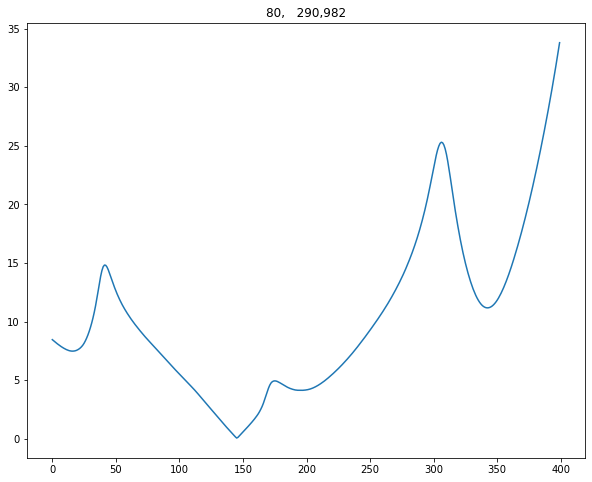

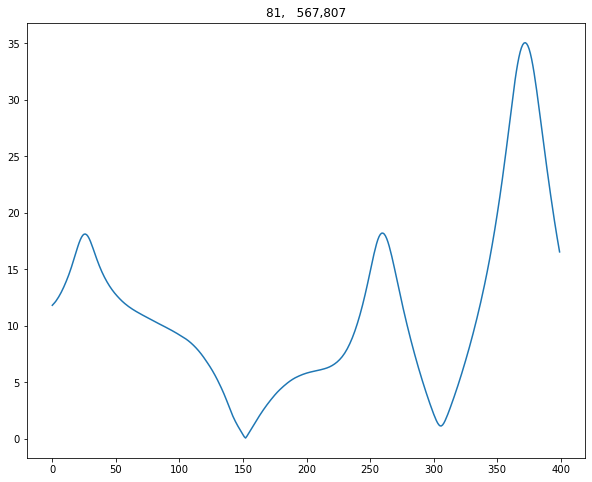

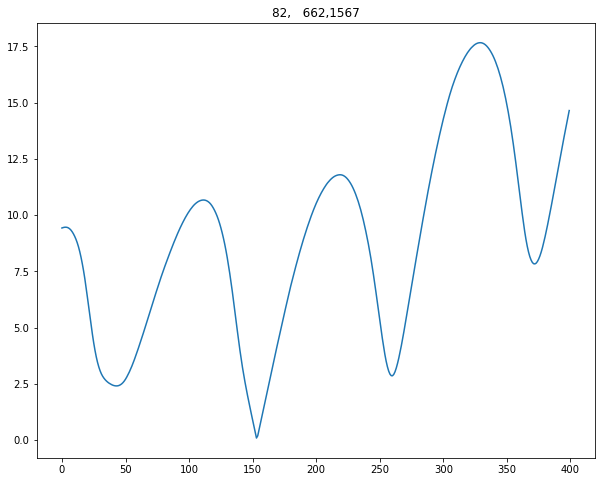

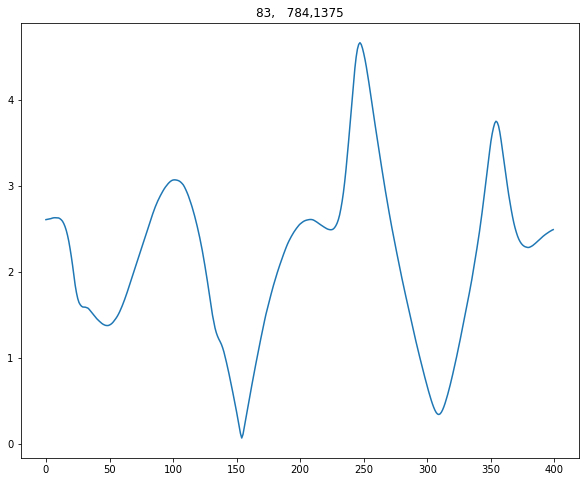

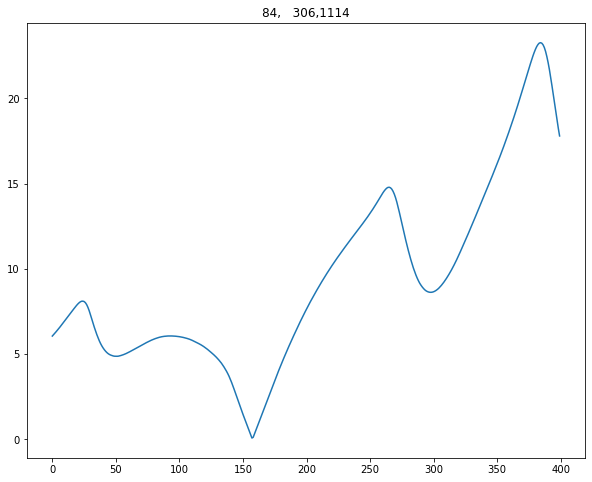

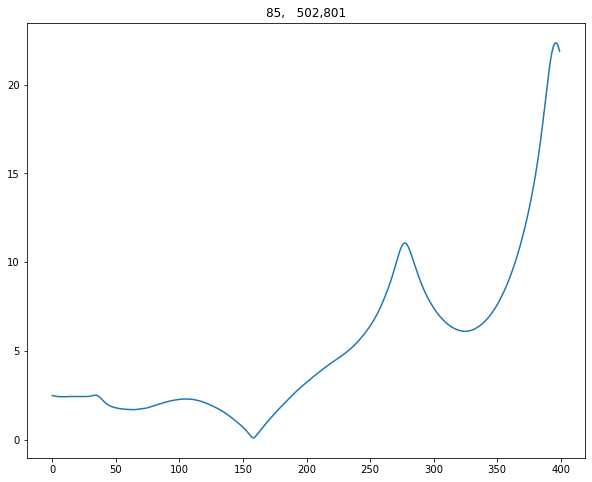

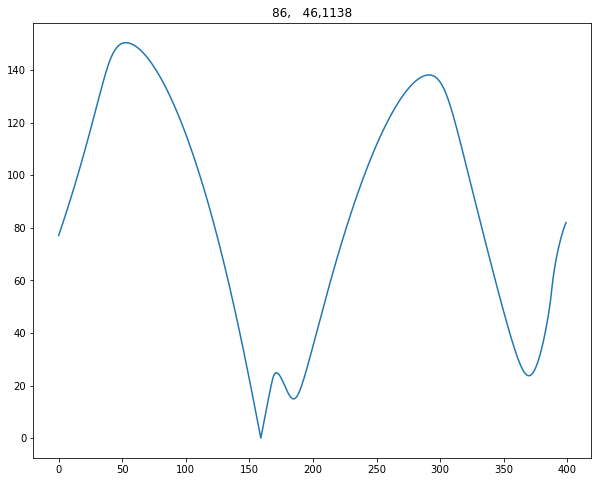

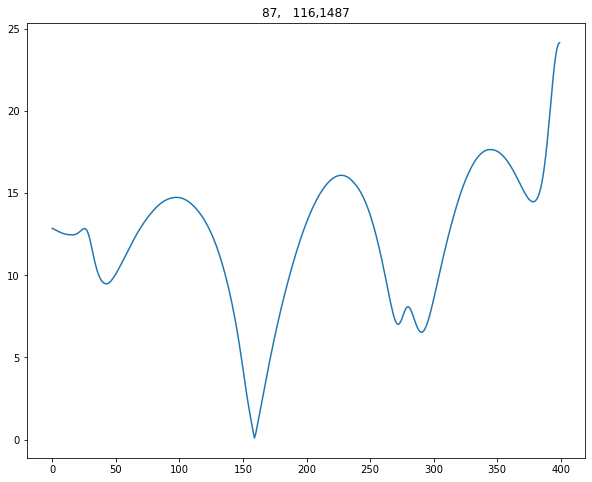

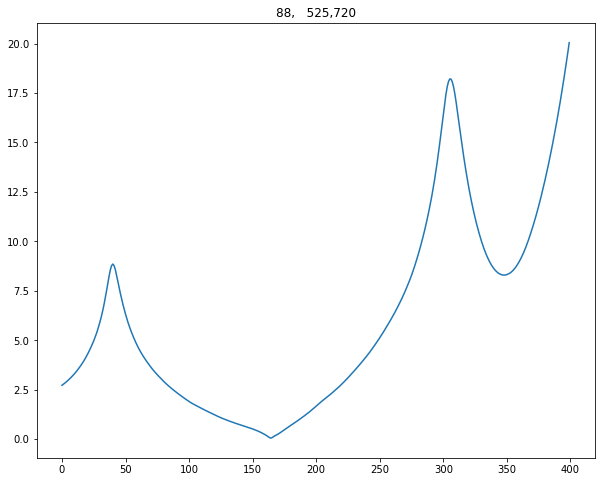

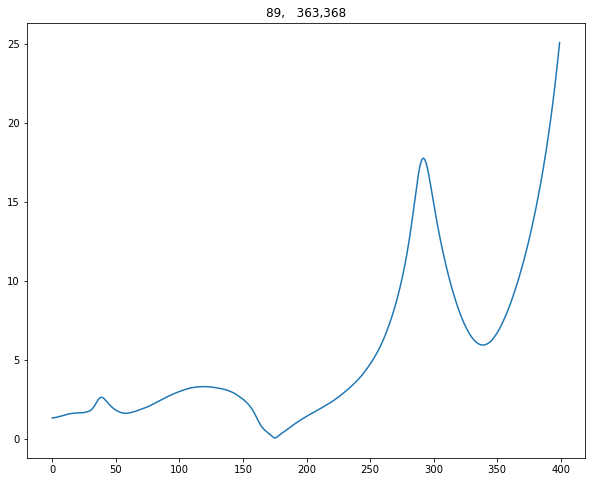

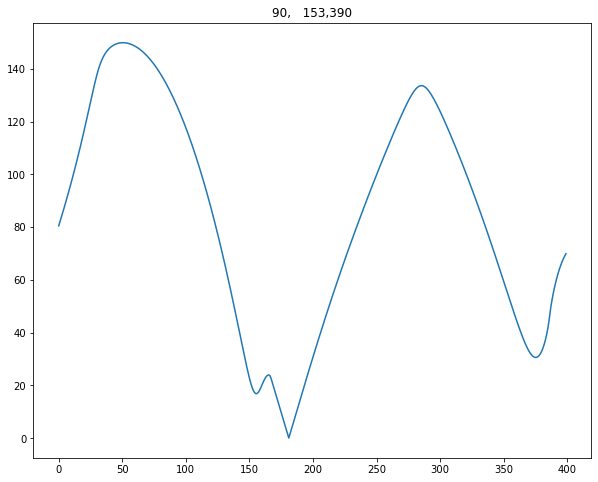

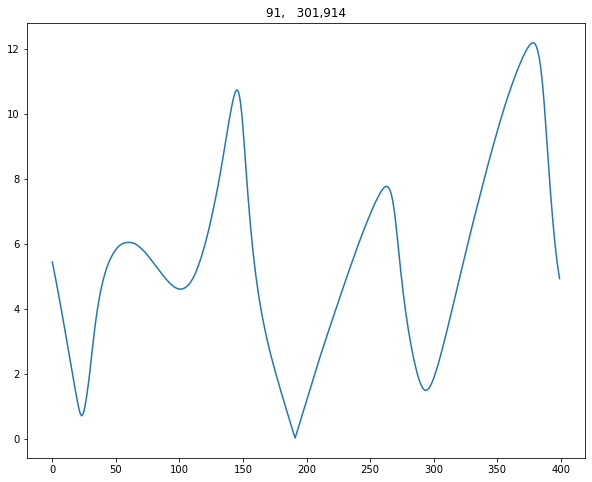

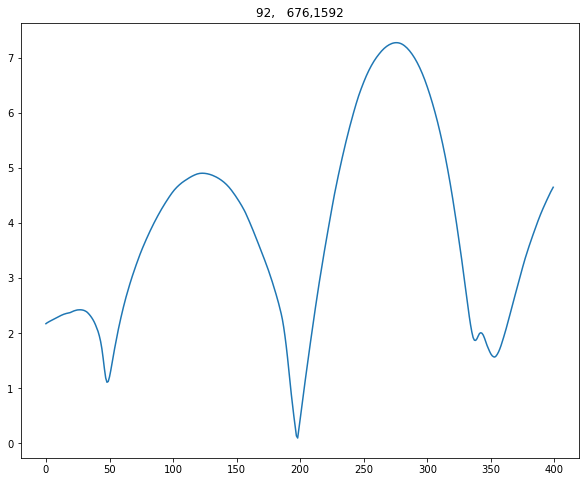

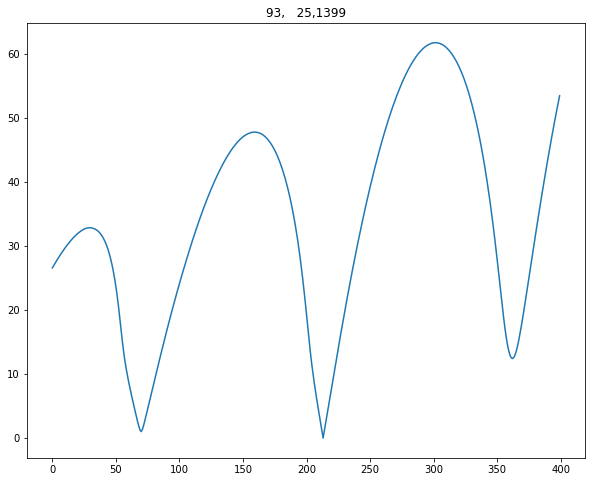

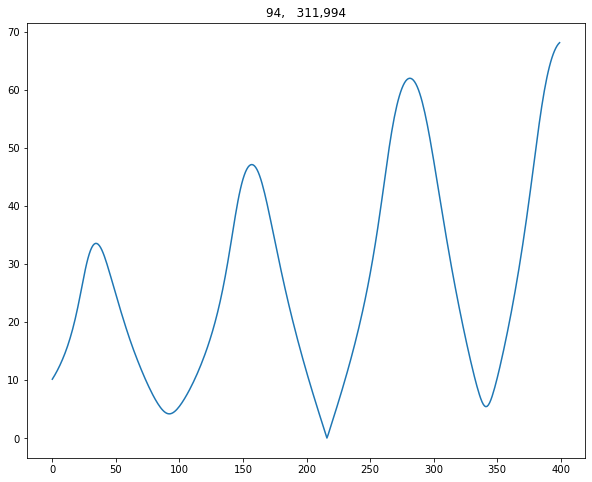

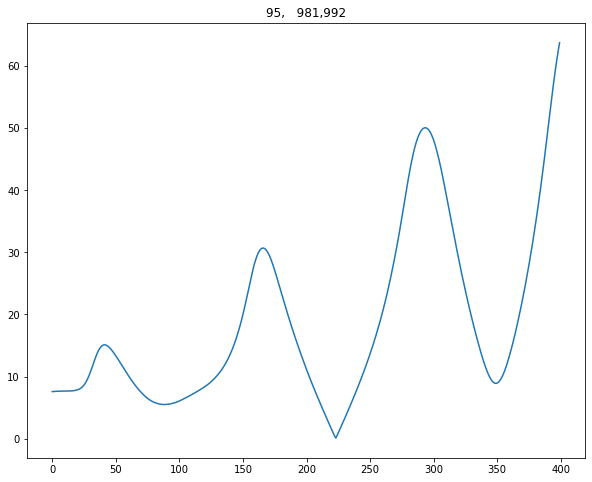

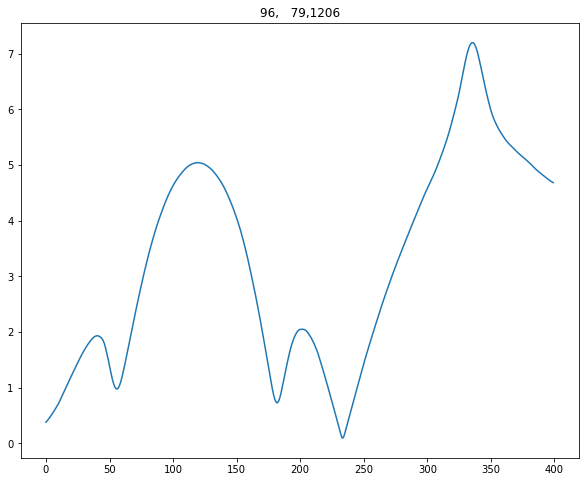

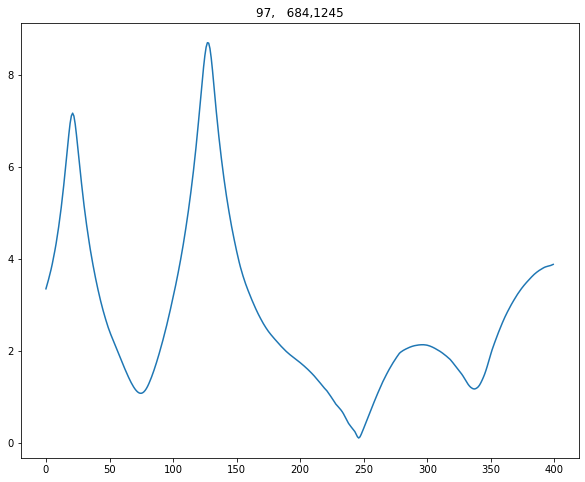

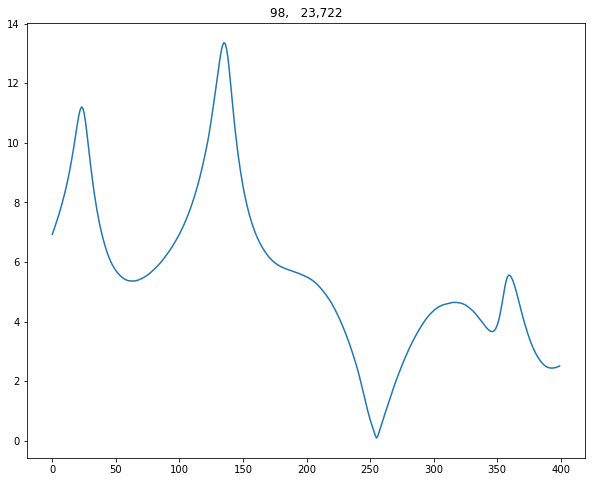

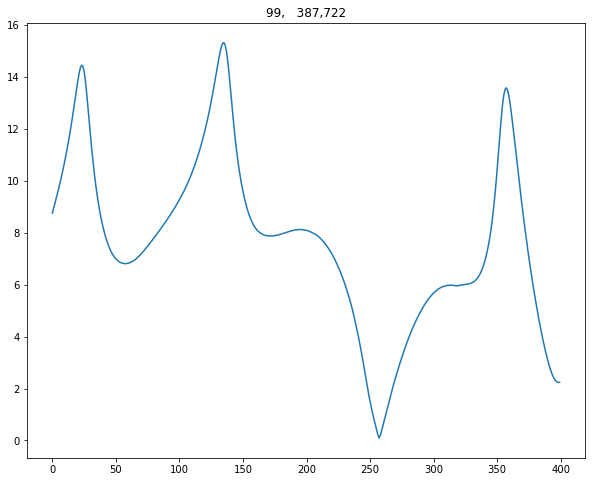

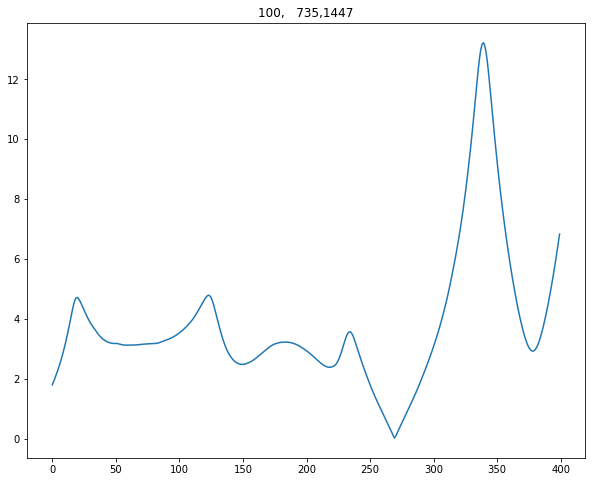

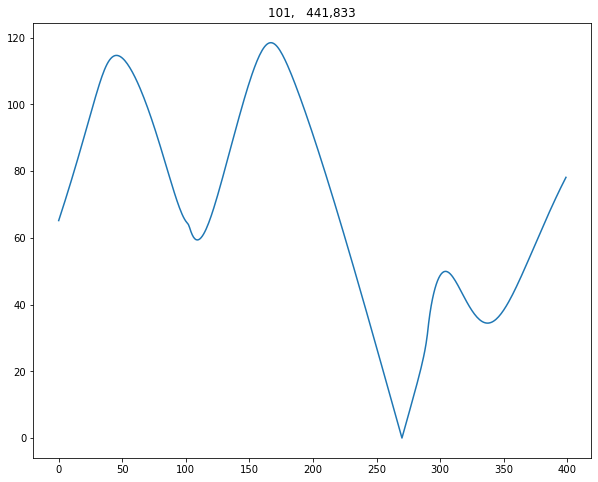

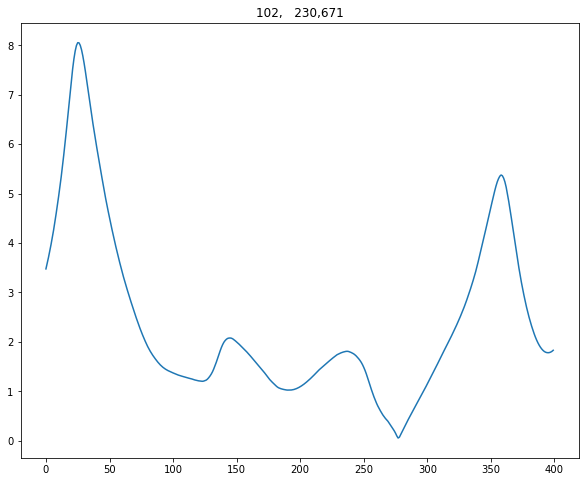

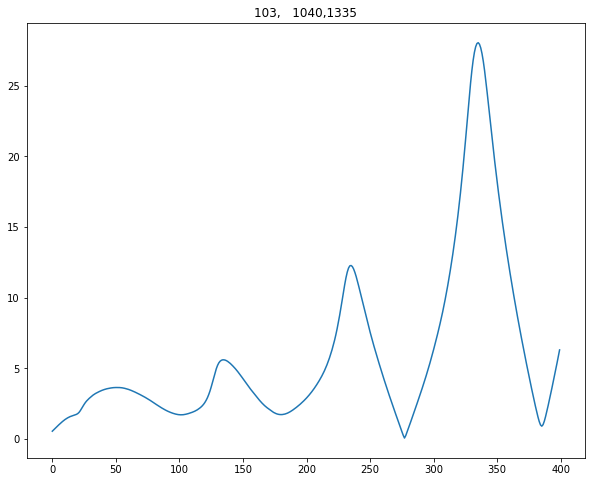

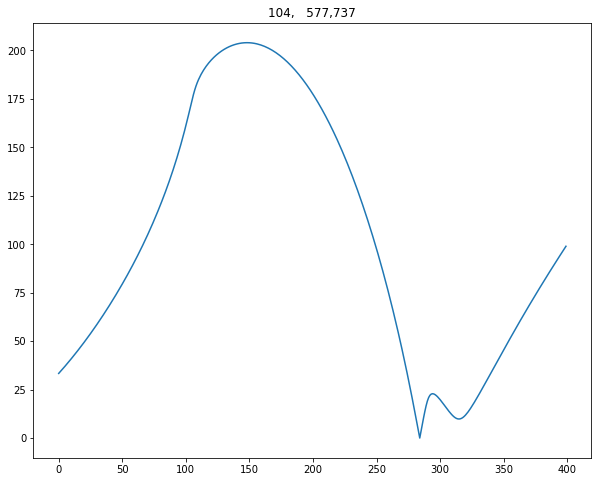

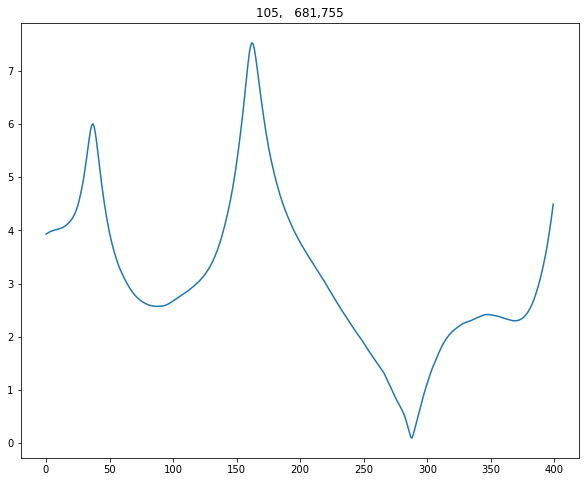

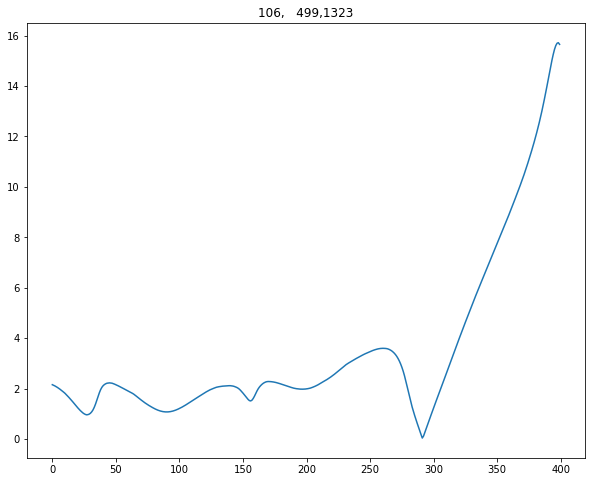

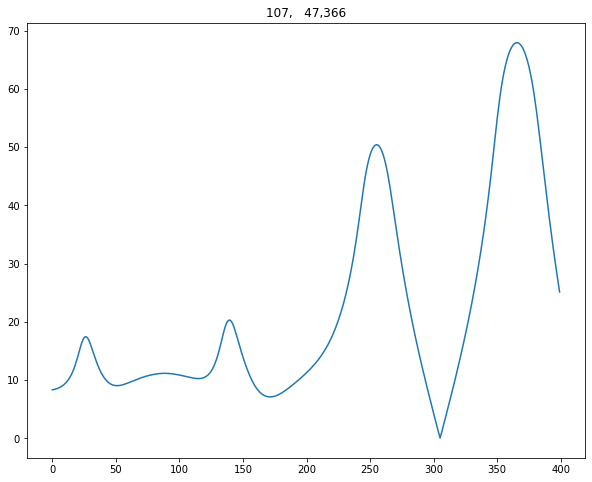

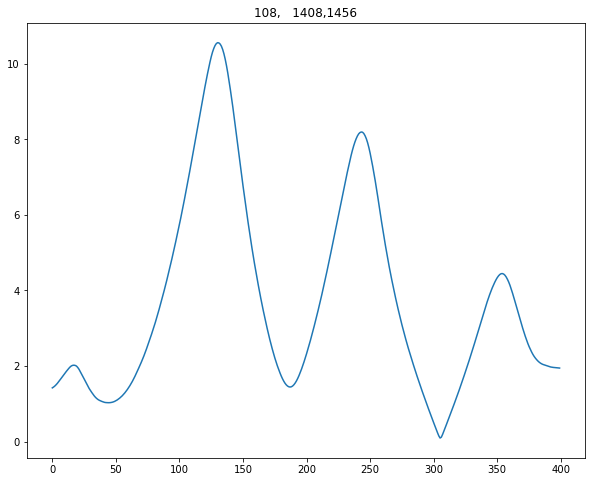

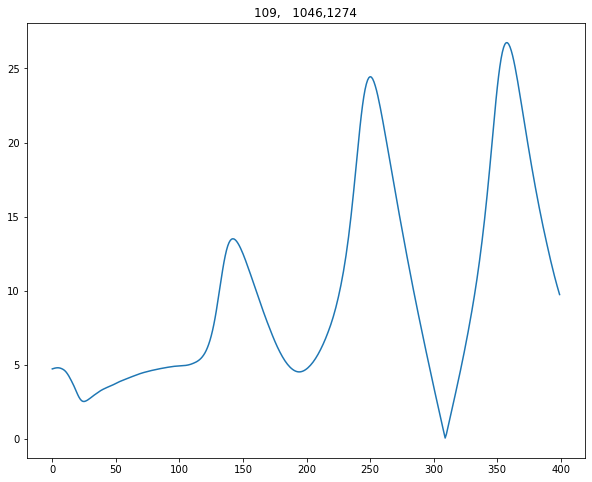

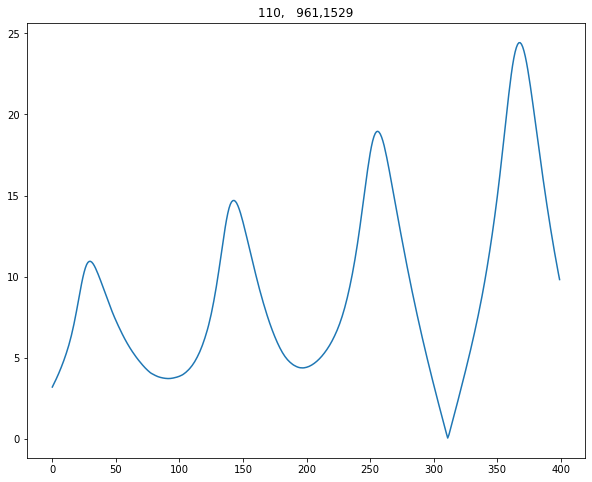

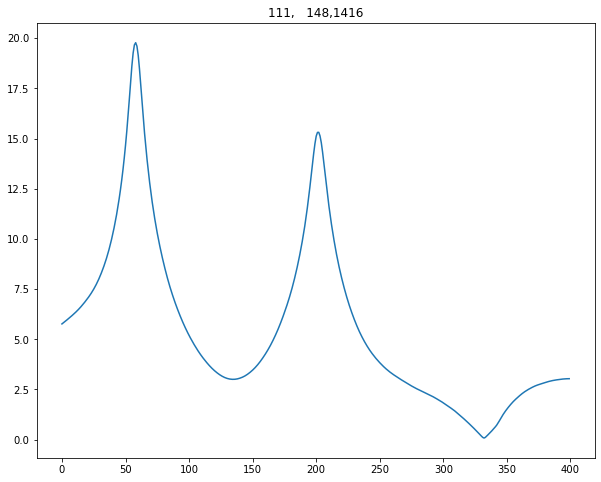

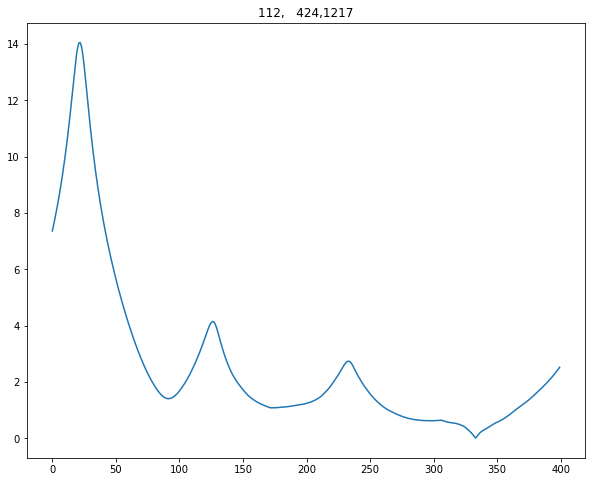

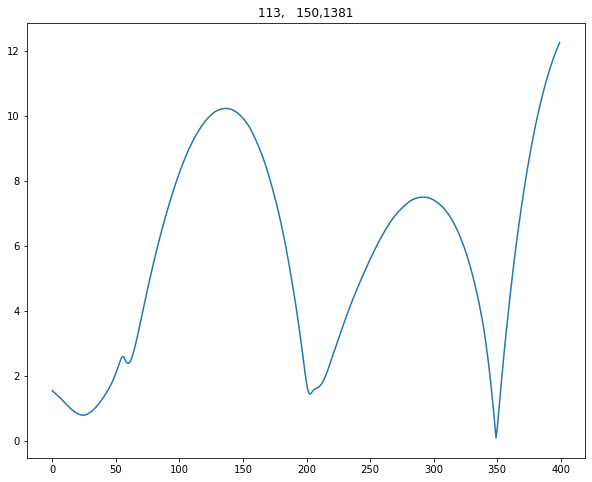

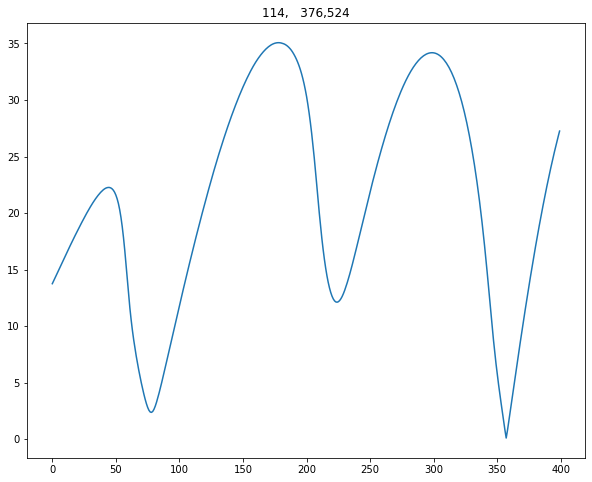

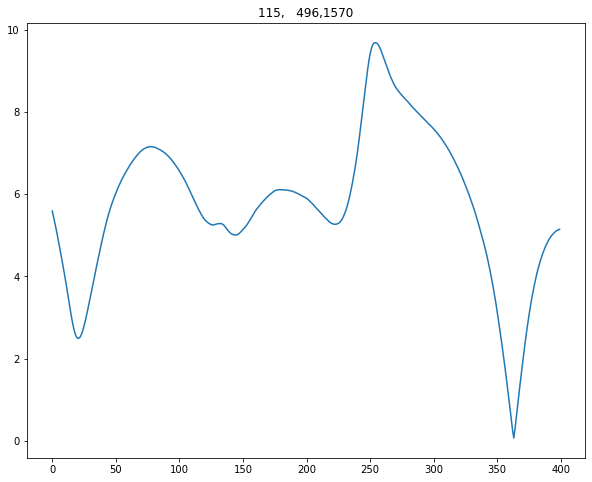

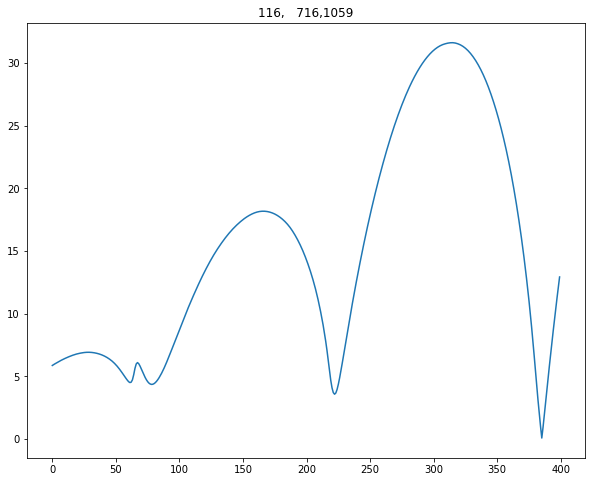

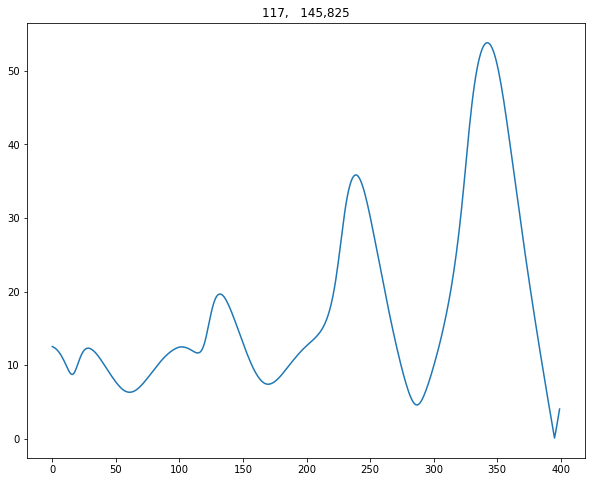

In [11]:
firsts = []
seconds = []
k = 0
for j in range(0, len(test2)):
    b = False
    x11 = []
    x12 = []
    y11 = []
    y12 = []
    z11 = []
    z12 = []
    first, second = test2[j][1], test2[j][2]
    for i in range(0, len(firsts)):
        if (firsts[i] == first and seconds[i] == second):
            b = True
            break
    if b == True:
        b = False
        continue
    firsts.append(first)
    seconds.append(second)
    
    plt.figure(figsize=[10,8])
    for i in range(2000, 6000, 10):
        Data = fits.open("Tidal_Wave/Final/Data/Final_save_data_%04d.fits"%i)
        TrueData = Data[1].data

        Xsetdata2 = TrueData.field("set_2_x") |units.m
        Ysetdata2 = TrueData.field("set_2_y") |units.m
        Zsetdata2 = TrueData.field("set_2_z") |units.m

        x2 = Xsetdata2[mask].value_in(units.kpc)
        y2 = Ysetdata2[mask].value_in(units.kpc)
        z2 = Zsetdata2[mask].value_in(units.kpc)

        x11.append(x2[first])
        x12.append(x2[second])
        y11.append(y2[first])
        y12.append(y2[second])
        z11.append(z2[first])
        z12.append(z2[second])
    
    Dis = Distance(np.array(x11), np.array(x12), np.array(y11), np.array(y12), np.array(z11), np.array(z12))
    plt.plot(Dis)
    plt.title(str(k)+",   "+str(first)+","+str(second))
    plt.show()
    k += 1

In [10]:
#New Ones:
#684, 1199??

#Binary:
#462, 1526
#600, 782
#635, 1215
#763, 828
# 70, 861 of mask
#617, 1558 of mask
#944, 1192 of mask

#309, 878 of mask??

#three system?
#430, 1279
#434, 1279
#430, 434 of mask

#248, 971 of mask is weird
#248, 1069 of mask is weird
#248, 1359 of mask is questionable
#971, 1359

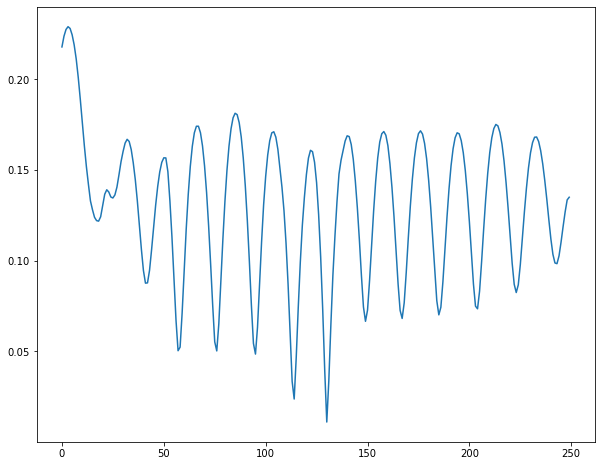

In [17]:
x11 = []
x12 = []
y11 = []
y12 = []
z11 = []
z12 = []
plt.figure(figsize=[10,8])
first, second = 635, 1215
for i in range(2000, 6000, 10):
    Data = fits.open("Tidal_Wave/Final/Data/Final_save_data_%04d.fits"%i)
    TrueData = Data[1].data

    Xsetdata2 = TrueData.field("set_2_x") |units.m
    Ysetdata2 = TrueData.field("set_2_y") |units.m
    Zsetdata2 = TrueData.field("set_2_z") |units.m

    x2 = Xsetdata2[mask].value_in(units.kpc)
    y2 = Ysetdata2[mask].value_in(units.kpc)
    z2 = Zsetdata2[mask].value_in(units.kpc)


    x11.append(x2[first])
    x12.append(x2[second])
    y11.append(y2[first])
    y12.append(y2[second])
    z11.append(z2[first])
    z12.append(z2[second])
    
Dis = Distance(np.array(x11), np.array(x12), np.array(y11), np.array(y12), np.array(z11), np.array(z12))
plt.plot(Dis[:250])
plt.show()

In [20]:
Binaries1 = [462, 600, 70, 309, 617, 944]
Binaries2 = [1526, 782, 861, 878, 1558, 1192]

In [25]:
x21 = [[],[],[],[],[],[]]
y21 = [[],[],[],[],[],[]]
z21 = [[],[],[],[],[],[]]
vx21 = [[],[],[],[],[],[]]
vy21 = [[],[],[],[],[],[]]
vz21 = [[],[],[],[],[],[]]
x22 = [[],[],[],[],[],[]]
y22 = [[],[],[],[],[],[]]
z22 = [[],[],[],[],[],[]]
vx22 = [[],[],[],[],[],[]]
vy22 = [[],[],[],[],[],[]]
vz22 = [[],[],[],[],[],[]]
for j in range(0, len(Binaries1)):
    for i in range(2000, 6000, 10):
        Data = fits.open("Tidal_Wave/Final/Data/Final_save_data_%04d.fits"%i)
        TrueData = Data[1].data

        Xsetdata2 = TrueData.field("set_2_x") |units.m
        Ysetdata2 = TrueData.field("set_2_y") |units.m
        Zsetdata2 = TrueData.field("set_2_z") |units.m
        VXsetdata2 = TrueData.field("set_2_vx") |units.kms
        VYsetdata2 = TrueData.field("set_2_vy") |units.kms
        VZsetdata2 = TrueData.field("set_2_vz") |units.kms

        x2 = Xsetdata2[mask].value_in(units.kpc)
        y2 = Ysetdata2[mask].value_in(units.kpc)
        z2 = Zsetdata2[mask].value_in(units.kpc)
        vx2 = VXsetdata2[mask].value_in(units.kms)
        vy2 = VYsetdata2[mask].value_in(units.kms)
        vz2 = VZsetdata2[mask].value_in(units.kms)

        x21[j].append(x2[Binaries1[j]])
        y21[j].append(y2[Binaries1[j]])
        z21[j].append(z2[Binaries1[j]])
        vx21[j].append(vx2[Binaries1[j]])
        vy21[j].append(vy2[Binaries1[j]])
        vz21[j].append(vz2[Binaries1[j]])

        x22[j].append(x2[Binaries2[j]])
        y22[j].append(y2[Binaries2[j]])
        z22[j].append(z2[Binaries2[j]])
        vx22[j].append(vx2[Binaries2[j]])
        vy22[j].append(vy2[Binaries2[j]])
        vz22[j].append(vz2[Binaries2[j]])

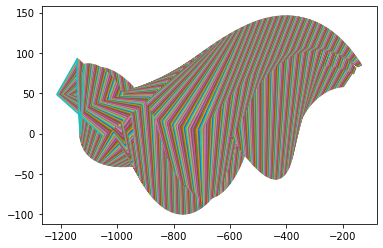

In [40]:
plt.plot(x21, y21)
#plt.plot(x22, y22)
plt.show()

In [26]:
v_abs1 = [[],[],[],[],[],[]]
v_abs2 = [[],[],[],[],[],[]]
v_rel = [[],[],[],[],[],[]]
r_rel = [[],[],[],[],[],[]]
for i in range(0, len(vx21[0])):
    for j in range(0, len(vx21)):
        v_abs1[j].append( np.sqrt(vx21[j][i]**2+vy21[j][i]**2+vz21[j][i]**2) )
        v_abs2[j].append( np.sqrt(vx22[j][i]**2+vy22[j][i]**2+vz22[j][i]**2) )
        v_rel[j].append( np.sqrt( (vx21[j][i]-vx22[j][i])**2 + (vy21[j][i]-vy22[j][i])**2 + (vz21[j][i]-vz22[j][i])**2) )
        r_rel[j].append( np.sqrt( (x21[j][i]-x22[j][i])**2 + (y21[j][i]-y22[j][i])**2 + (z21[j][i]-z22[j][i])**2))
        

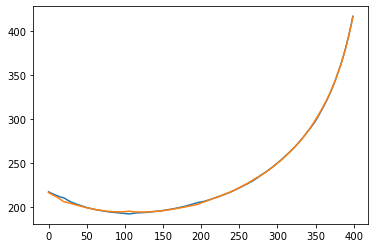

In [27]:
plt.plot(v_abs1[0])
plt.plot(v_abs2[0])
plt.show()

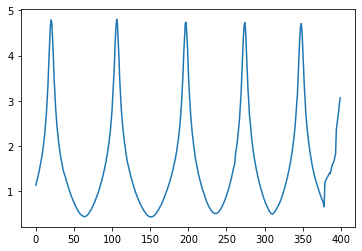

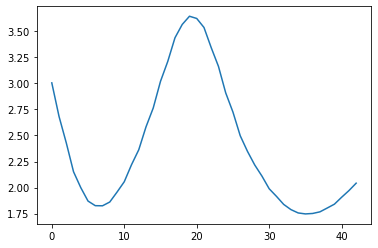

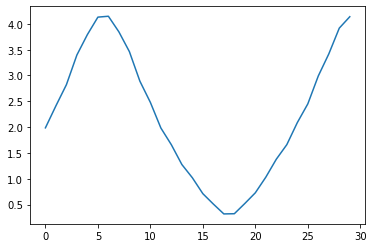

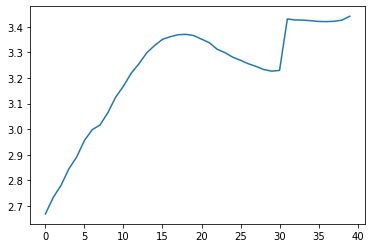

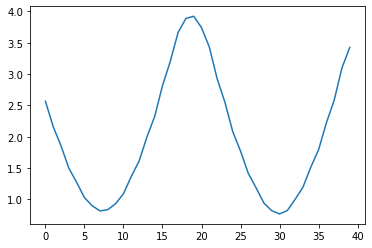

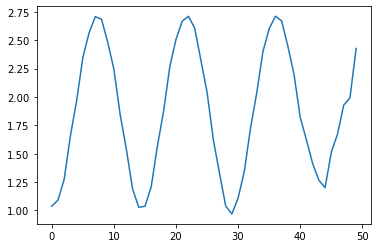

In [28]:
plt.plot(v_rel[0])
plt.show()

plt.plot(v_rel[1][:43])
plt.show()

plt.plot(v_rel[2][:30])
plt.show()

plt.plot(v_rel[3][25:65])
plt.show()

plt.plot(v_rel[4][:40])
plt.show()

plt.plot(v_rel[5][:50])
plt.show()

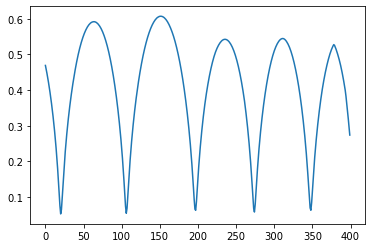

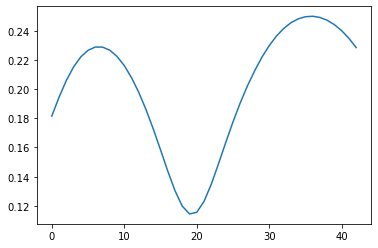

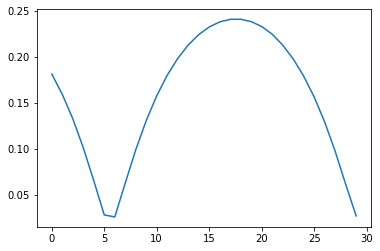

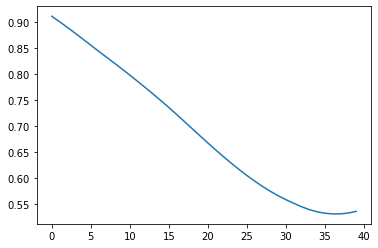

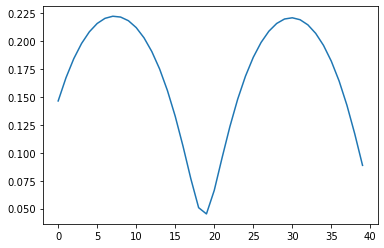

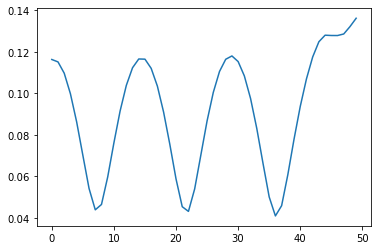

In [29]:
plt.plot(r_rel[0])
plt.show()

plt.plot(r_rel[1][:43])
plt.show()

plt.plot(r_rel[2][:30])
plt.show()

plt.plot(r_rel[3][25:65])
plt.show()

plt.plot(r_rel[4][:40])
plt.show()

plt.plot(r_rel[5][:50])
plt.show()

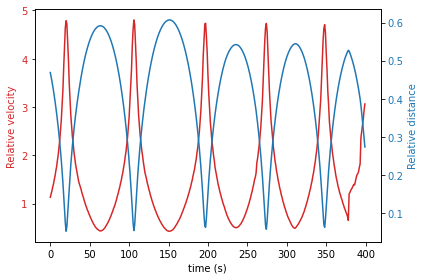

In [30]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Relative velocity', color=color)
ax1.plot(v_rel[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Relative distance', color=color)  # we already handled the x-label with ax1
ax2.plot(r_rel[0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

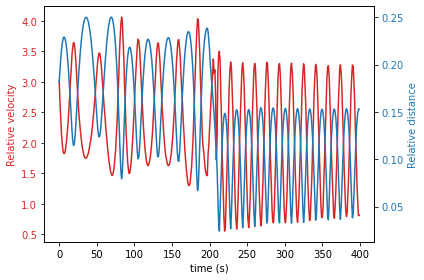

In [31]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Relative velocity', color=color)
ax1.plot(v_rel[1][:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Relative distance', color=color)  # we already handled the x-label with ax1
ax2.plot(r_rel[1][:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

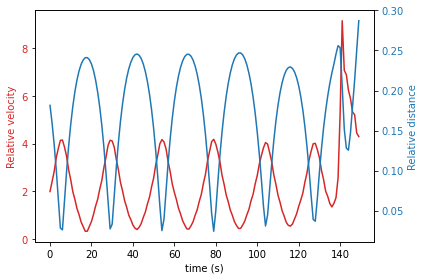

In [32]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Relative velocity', color=color)
ax1.plot(v_rel[2][:150], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Relative distance', color=color)  # we already handled the x-label with ax1
ax2.plot(r_rel[2][:150], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

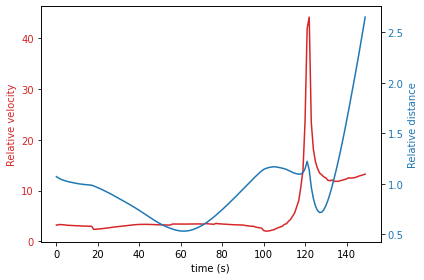

In [33]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Relative velocity', color=color)
ax1.plot(v_rel[3][:150], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Relative distance', color=color)  # we already handled the x-label with ax1
ax2.plot(r_rel[3][:150], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

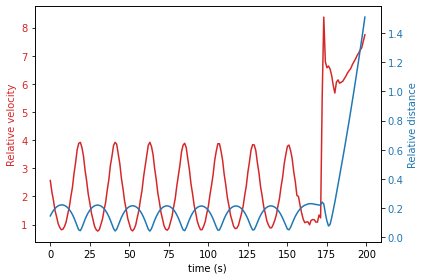

In [34]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Relative velocity', color=color)
ax1.plot(v_rel[4][:200], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Relative distance', color=color)  # we already handled the x-label with ax1
ax2.plot(r_rel[4][:200], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

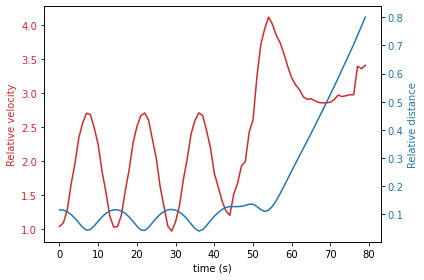

In [35]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Relative velocity', color=color)
ax1.plot(v_rel[5][:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Relative distance', color=color)  # we already handled the x-label with ax1
ax2.plot(r_rel[5][:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()